In [192]:
# Basic ones
import pandas as pd
import numpy as np

# Scipy
import scipy

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import svm

import catboost as cat # --> poderosísimo CATBOOST!

# Metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA, NMF
from pandas import qcut, cut
from sklearn.preprocessing import KBinsDiscretizer

# Model summaries n shit
import statsmodels.api as sm

# Datetime
from datetime import datetime as dt

## Ignore warnings 
# import warnings
# warnings.filterwarnings("ignore")

In [193]:
url = 'https://raw.githubusercontent.com/pedroteche-ih/DAFT_MEX_202209/main/data/tb_ames_housing.csv'
tb_housing = pd.read_csv(url)

In [194]:
tb_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

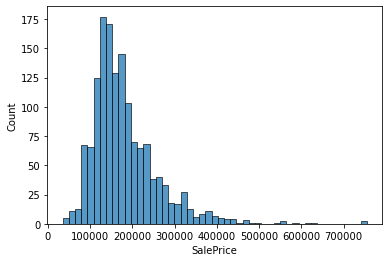

In [195]:
sns.histplot(data = tb_housing, x = 'SalePrice')

In [196]:
tb_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [214]:
y=pd.DataFrame(tb_housing.isnull().sum())
y.sort_values(by=0,ascending=False)[:20]

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [197]:
tb_housing.select_dtypes(include = 'object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [198]:
categorical= tb_housing[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']]
categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# CAT VARS

**THE FOLLOWING FUNCTION IS TO INSPECT CATEGORICAL VARIABLES AND IT WAS APPLIED IN A DIFFERENT NOTEBOOK**

In [199]:
total_cat_var=len(categorical.columns)
total_cat_var

43

In [200]:
def description (x):
    print(tb_housing[x].unique())
    print(tb_housing[x].dtype)
    print((tb_housing[x].isnull().sum())/(len(tb_housing[x])))
    print(tb_housing[x].hist())
    print(tb_housing[x].value_counts())
    

In [201]:
cat_var_list= ['MSZoning', 'Street', 'Alley', 'LotShape',
    'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 
    'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual',
    'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir',
    'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC',
    'Fence', 'MiscFeature','SaleType', 'SaleCondition']

In [268]:
exc_cat_vars=['LotShape','Neighborhood','HouseStyle','Exterior1st',
             'Exterior2nd','MasVnrType','ExterQual','Foundation',
             'BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC',
             'KitchenQual','GarageType','GarageFinish','SalePrice']

In [269]:
ok_cat_vars=['MSZoning','LotConfig','Condition1','BldgType',
             'RoofStyle','ExterCond','SaleCondition']

In [270]:
bad_cat_vars=['Street','Alley','LandContour','Utilities','LandSlope',
              'Condition2','RoofMatl','BsmtCond','BsmtFinType2',
              'Heating','CentralAir','Electrical','Functional',
              'GarageQual','GarageCond','PavedDrive','PoolQC',
              'FireplaceQu','Fence','MiscFeature','SaleType']

In [275]:
exc_cat=tb_housing[exc_cat_vars]
exc_cat.isnull().sum()

LotShape         0
Neighborhood     0
HouseStyle       0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
ExterQual        0
Foundation       0
BsmtQual        37
BsmtExposure    38
BsmtFinType1    37
HeatingQC        0
KitchenQual      0
GarageType      81
GarageFinish    81
SalePrice        0
dtype: int64

In [276]:
len(exc_cat.columns)

16

In [277]:
for i in exc_cat.columns:
    if (exc_cat[i].value_counts().iloc[0]>len(tb_housing)*.7)==True:
        exc_cat.drop(i,axis=1,inplace=True)
len(exc_cat.columns)

16

<AxesSubplot:xlabel='MasVnrType', ylabel='Count'>

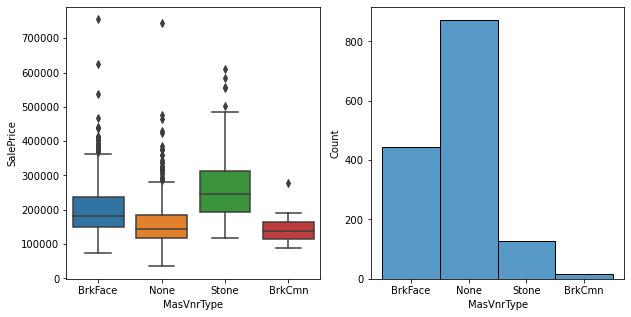

In [423]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'MasVnrType', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['MasVnrType'],ax = ax[1])

In [ ]:
exc_cat['MasVnrType'].fillna('None',inplace=True)

In [324]:
MasVnrType_group = {
        "BrkFace": "MasVnr",
        "None": "None",
        "Stone": "MasVnr",
        "BrkCmn": "MasVnr",
    }
exc_cat["grp_MasVnrType"] = exc_cat["MasVnrType"].map(MasVnrType_group)

['MasVnr' 'None']


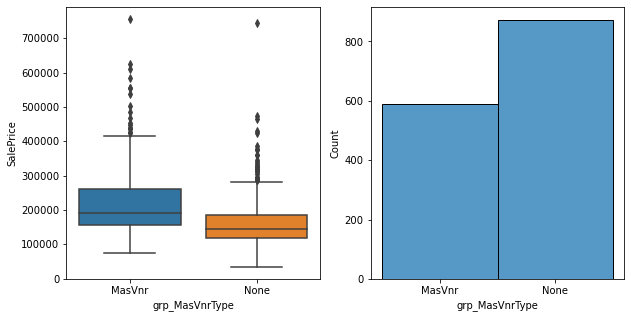

In [422]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'grp_MasVnrType', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['grp_MasVnrType'],ax = ax[1])
print(exc_cat['grp_MasVnrType'].unique())

<AxesSubplot:xlabel='BsmtQual', ylabel='Count'>

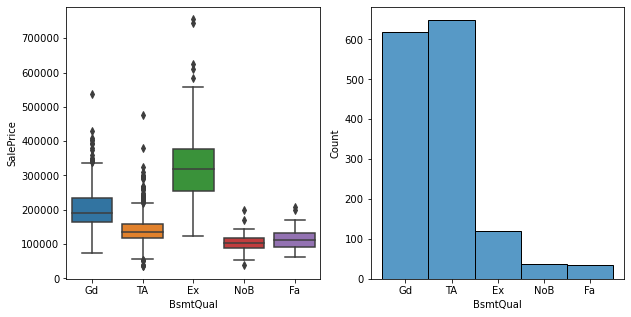

In [421]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'BsmtQual', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['BsmtQual'],ax = ax[1])

In [ ]:
exc_cat['BsmtQual'].fillna('NoB',inplace=True)

In [336]:
BsmtQual_group = {
        "Ex": "Excelent",
        "Gd": "Good",
        "TA": "Bad",
        "NoB": "Bad",
        "Fa": "Bad",
    }
exc_cat["grp_BsmtQual"] = exc_cat["BsmtQual"].map(BsmtQual_group)

<AxesSubplot:xlabel='grp_BsmtQual', ylabel='Count'>

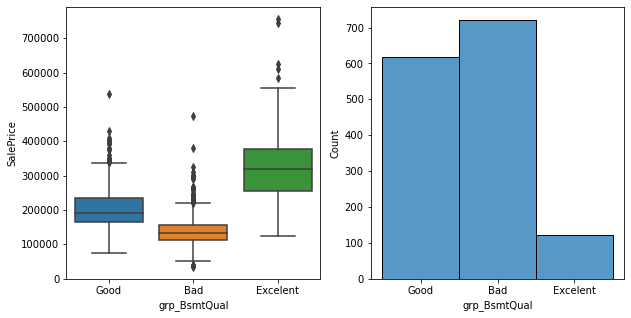

In [420]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'grp_BsmtQual', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['grp_BsmtQual'],ax = ax[1])

<AxesSubplot:xlabel='BsmtExposure', ylabel='Count'>

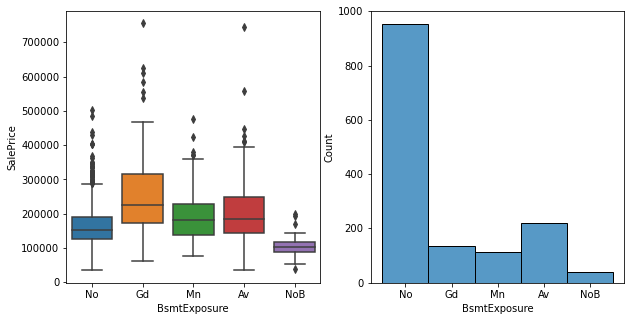

In [419]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'BsmtExposure', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['BsmtExposure'],ax = ax[1])

In [ ]:
exc_cat['BsmtExposure'].fillna('NoB',inplace=True)

In [326]:
BsmtExposure_group = {
        "No": "NoExposure",
        "Gd": "Exposure",
        "Mn": "Exposure",
        "Av": "Exposure",
        "NoB": "NoExposure",
    }
exc_cat["grp_BsmtExposure"] = exc_cat["BsmtExposure"].map(BsmtExposure_group)

<AxesSubplot:xlabel='grp_BsmtExposure', ylabel='Count'>

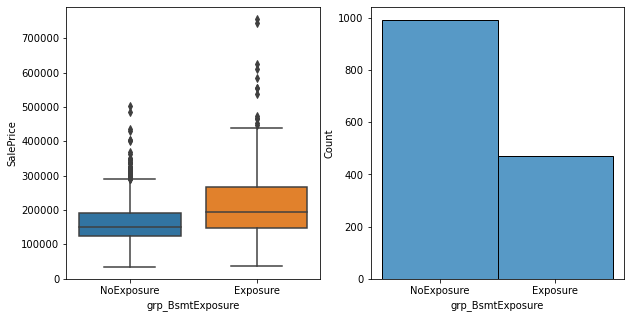

In [418]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'grp_BsmtExposure', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['grp_BsmtExposure'],ax = ax[1])

<AxesSubplot:xlabel='BsmtFinType1', ylabel='Count'>

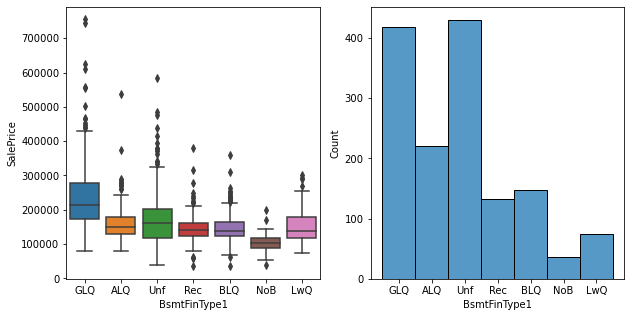

In [417]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'BsmtFinType1', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['BsmtFinType1'],ax = ax[1])

In [ ]:
exc_cat['BsmtFinType1'].fillna('NoB',inplace=True)

In [329]:
BsmtFinType1_group = {
        "GLQ": "Good",
        "ALQ": "Good",
        "Unf": "Worse",
        "Rec": "Bad",
        "BLQ": "Bad",
        "NoB": "Worse",
        "LwQ": "Bad",
    }
exc_cat["grp_BsmtFinType1"] = exc_cat["BsmtFinType1"].map(BsmtFinType1_group)

<AxesSubplot:xlabel='grp_BsmtFinType1', ylabel='Count'>

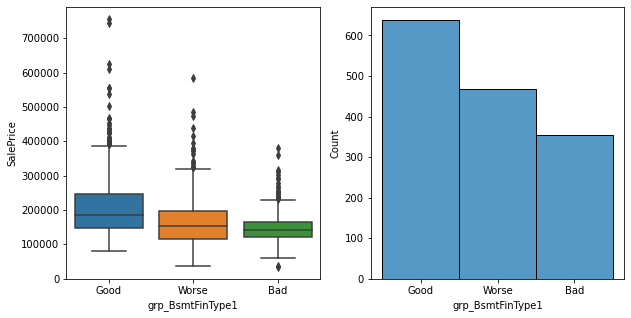

In [416]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'grp_BsmtFinType1', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['grp_BsmtFinType1'],ax = ax[1])

<AxesSubplot:xlabel='GarageType', ylabel='Count'>

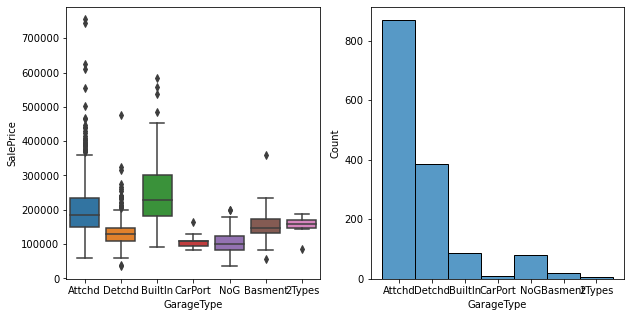

In [415]:
exc_cat['GarageType'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'GarageType', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['GarageType'],ax = ax[1])

In [ ]:
exc_cat['GarageType'].fillna('NoG',inplace=True)

In [331]:
GarageType_group = {
        "Attchd": "Type1",
        "Detchd": "Type2",
        "BuiltIn": "Type1",
        "CarPort": "Type2",
        "NoG": "Type2",
        "Basment": "Type2",
        "2Types": "Type2",
    }
exc_cat["grp_GarageType"] = exc_cat["GarageType"].map(GarageType_group)

<AxesSubplot:xlabel='grp_GarageType', ylabel='Count'>

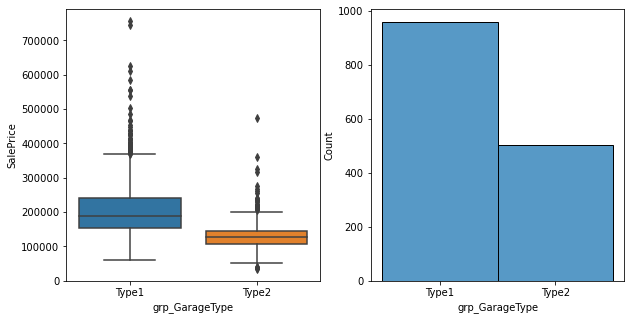

In [414]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'grp_GarageType', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['grp_GarageType'],ax = ax[1])

<AxesSubplot:xlabel='GarageFinish', ylabel='Count'>

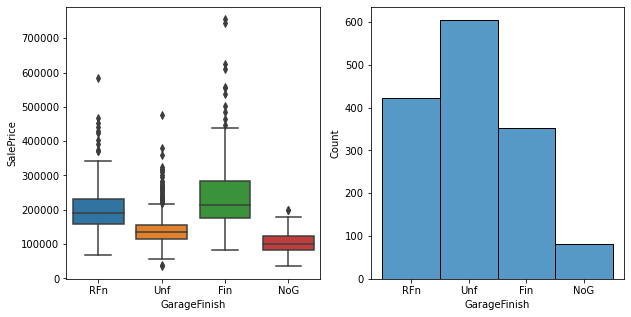

In [413]:
exc_cat['GarageFinish'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'GarageFinish', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['GarageFinish'],ax = ax[1])

In [ ]:
exc_cat['GarageFinish'].fillna('NoG',inplace=True)

In [333]:
GarageFinish_group = {
        "RFn": "Type1",
        "Unf": "Type2",
        "Fin": "Type1",
        "NoG": "Type2",
    }
exc_cat["grp_GarageFinish"] = exc_cat["GarageFinish"].map(GarageFinish_group)

<AxesSubplot:xlabel='grp_GarageFinish', ylabel='Count'>

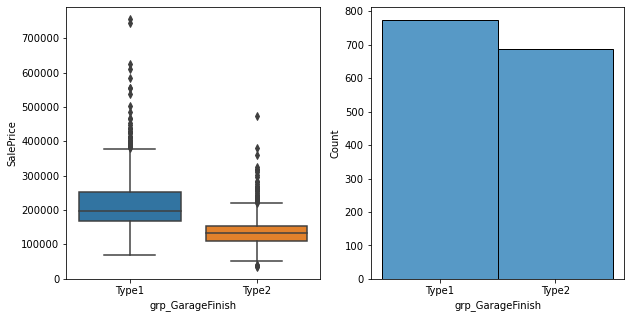

In [412]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'grp_GarageFinish', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['grp_GarageFinish'],ax = ax[1])

<AxesSubplot:xlabel='LotShape', ylabel='Count'>

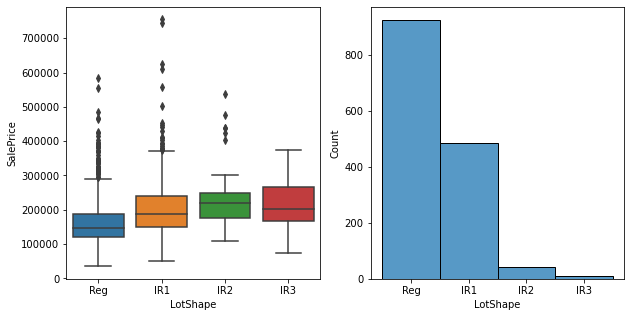

In [411]:
exc_cat['LotShape'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'LotShape', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['LotShape'],ax = ax[1])

In [341]:
LotShape_group = {
        "Reg": "Reg",
        "IR1": "Irreg",
        "IR2": "Irreg",
        "IR3": "Irreg",
    }
exc_cat["grp_LotShape"] = exc_cat["LotShape"].map(LotShape_group)

<AxesSubplot:xlabel='grp_LotShape', ylabel='Count'>

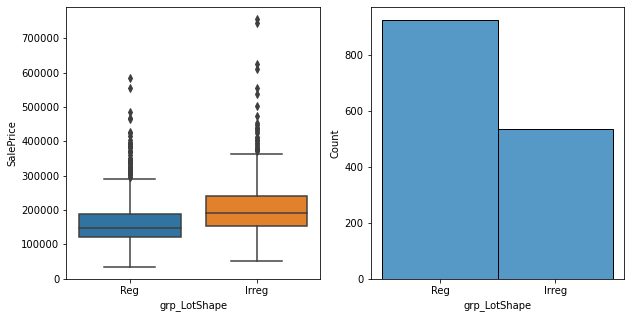

In [410]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'grp_LotShape', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['grp_LotShape'],ax = ax[1])

<AxesSubplot:xlabel='Neighborhood', ylabel='Count'>

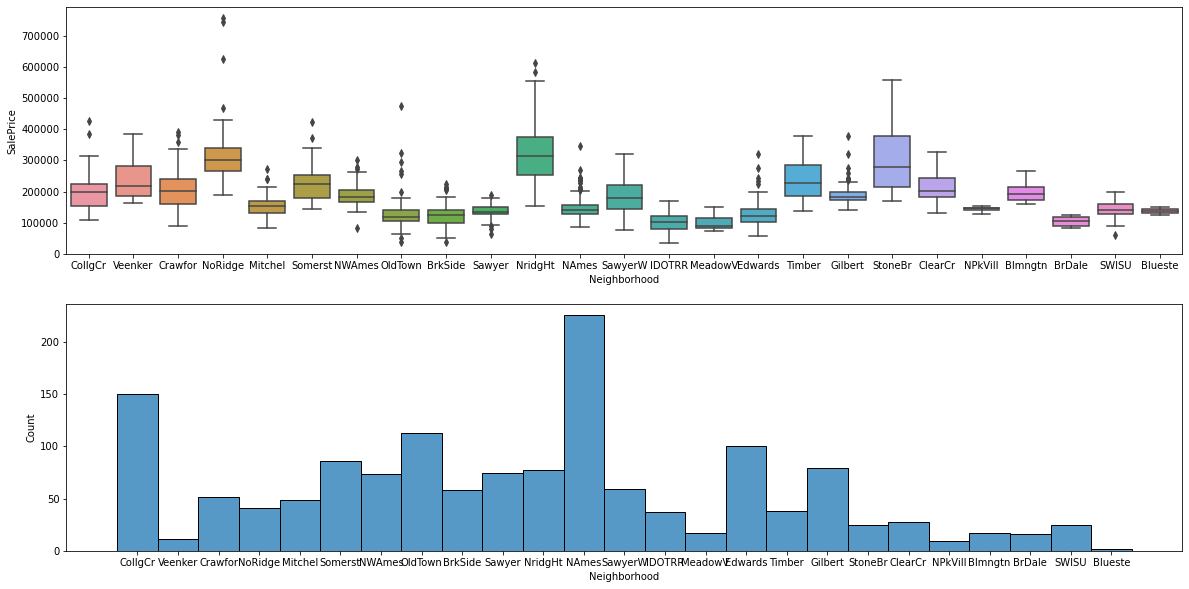

In [409]:
exc_cat['Neighborhood'].value_counts()
fig, ax = plt.subplots(2, 1, figsize = (20, 10))
sns.boxplot(data = exc_cat, x = 'Neighborhood', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['Neighborhood'],ax = ax[1])

In [351]:
tb_housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [407]:
neigh_avgSalePrice=tb_housing.groupby('Neighborhood').mean()['SalePrice'].reset_index()
neigh_avgSalePrice['avg_city_price']=np.mean(tb_housing['SalePrice'])
neigh_avgSalePrice['Q25_city_price']=np.quantile(tb_housing['SalePrice'],.25)
neigh_avgSalePrice['Q75_city_price']=np.quantile(tb_housing['SalePrice'],.75)
neigh_avgSalePrice

,Neighborhood,SalePrice,avg_city_price,Q25_city_price,Q75_city_price
0,Blmngtn,194870.882353,180921.19589,129975.0,214000.0
1,Blueste,137500.000000,180921.19589,129975.0,214000.0
2,BrDale,104493.750000,180921.19589,129975.0,214000.0
3,BrkSide,124834.051724,180921.19589,129975.0,214000.0
4,ClearCr,212565.428571,180921.19589,129975.0,214000.0
5,CollgCr,197965.773333,180921.19589,129975.0,214000.0
6,Crawfor,210624.725490,180921.19589,129975.0,214000.0
7,Edwards,128219.700000,180921.19589,129975.0,214000.0
8,Gilbert,192854.506329,180921.19589,129975.0,214000.0
9,IDOTRR,100123.783784,180921.19589,129975.0,214000.0


In [ ]:
neigh_avgSalePrice['avg_city_price']=np.mean(tb_housing['SalePrice'])

Final outcome: a dictionary with thge name of the neighborhood and its avgpricerange name. ex. 'Downtown':'High' 

I have ranges of average price. i.e quartiles in describe. 

I have a neighborhood list with average sales. 

can I map this? how?


In [378]:
N25=(tb_housing.groupby('Neighborhood').mean()['SalePrice']<129975.000000).reset_index()
N25.sort_values(by='SalePrice',ascending=False)[:7]

,Neighborhood,SalePrice
2,BrDale,True
3,BrkSide,True
7,Edwards,True
9,IDOTRR,True
10,MeadowV,True
17,OldTown,True
0,Blmngtn,False


In [391]:
N50=(tb_housing.groupby('Neighborhood').mean()['SalePrice']<163000.000000).reset_index()
N50.sort_values(by='SalePrice',ascending=False)[:16]

,Neighborhood,SalePrice
12,NAmes,True
17,OldTown,True
2,BrDale,True
3,BrkSide,True
7,Edwards,True
9,IDOTRR,True
10,MeadowV,True
11,Mitchel,True
1,Blueste,True
13,NPkVill,True


In [397]:
N75=(tb_housing.groupby('Neighborhood').mean()['SalePrice']<214000.000000).reset_index()
N75.sort_values(by='SalePrice',ascending=False)[:30]

,Neighborhood,SalePrice
0,Blmngtn,True
10,MeadowV,True
20,SawyerW,True
19,Sawyer,True
18,SWISU,True
17,OldTown,True
14,NWAmes,True
13,NPkVill,True
1,Blueste,True
11,Mitchel,True


In [399]:
N100=(tb_housing.groupby('Neighborhood').mean()['SalePrice']>214000.000000).reset_index()
N100.sort_values(by='SalePrice',ascending=False)[:10]

,Neighborhood,SalePrice
24,Veenker,True
23,Timber,True
22,StoneBr,True
21,Somerst,True
16,NridgHt,True
15,NoRidge,True
13,NPkVill,False
20,SawyerW,False
19,Sawyer,False
18,SWISU,False


In [364]:
tb_housing['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [400]:
Neighborhood_group = {
        'CollgCr':'High', 
        'Veenker':'Best', 
        'Crawfor':'High', 
        'NoRidge':'Best', 
        'Mitchel':'Medium', 
        'Somerst':'Best',
        'NWAmes':'High', 
        'OldTown':'Low', 
        'BrkSide':'Low', 
        'Sawyer':'Medium', 
        'NridgHt':'Best', 
        'NAmes':'Medium',
        'SawyerW':'High', 
        'IDOTRR':'Low', 
        'MeadowV':'Low', 
        'Edwards':'Low', 
        'Timber':'Best', 
        'Gilbert':'High',
        'StoneBr':'Best', 
        'ClearCr':'High', 
        'NPkVill':'Medium', 
        'Blmngtn':'High', 
        'BrDale':'Low', 
        'SWISU':'Medium',
        'Blueste':'Medium'
    }
exc_cat["grp_Neighborhood"] = exc_cat["Neighborhood"].map(Neighborhood_group)

<AxesSubplot:xlabel='grp_Neighborhood', ylabel='Count'>

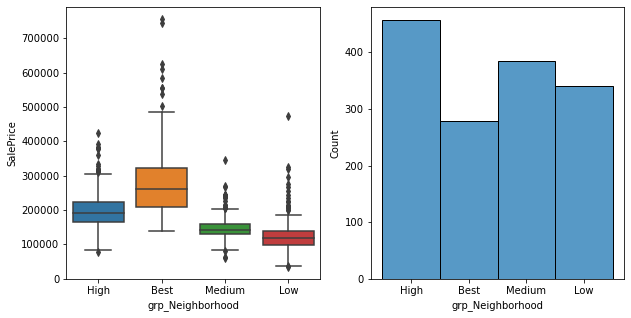

In [408]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'grp_Neighborhood', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['grp_Neighborhood'],ax = ax[1])

<AxesSubplot:xlabel='HouseStyle', ylabel='Count'>

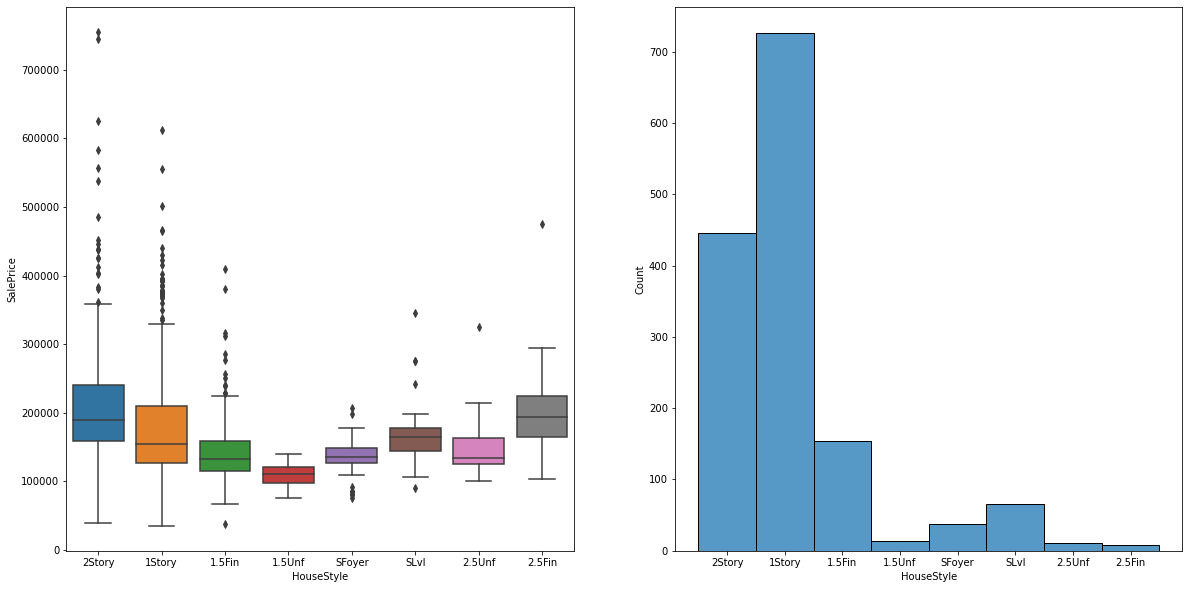

In [425]:
exc_cat['HouseStyle'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.boxplot(data = exc_cat, x = 'HouseStyle', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['HouseStyle'],ax = ax[1])

In [446]:
HouseStyle_group = {
        "2Story": "2+",
        "1Story": "1+",
        "1.5Fin": "1+",
        "1.5Unf": "1+",
        "SFoyer": "1+",
        "SLvl": "1+",
        "2.5Unf": "2+",
        "2.5Fin": "2+",
    }
exc_cat["grp_HouseStyle"] = exc_cat["HouseStyle"].map(HouseStyle_group)

<AxesSubplot:xlabel='grp_HouseStyle', ylabel='Count'>

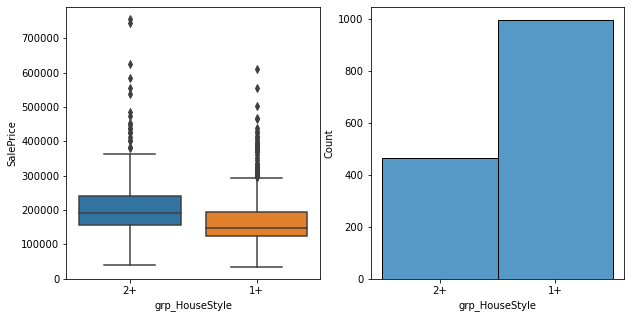

In [447]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'grp_HouseStyle', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['grp_HouseStyle'],ax = ax[1])

<AxesSubplot:xlabel='Exterior1st', ylabel='Count'>

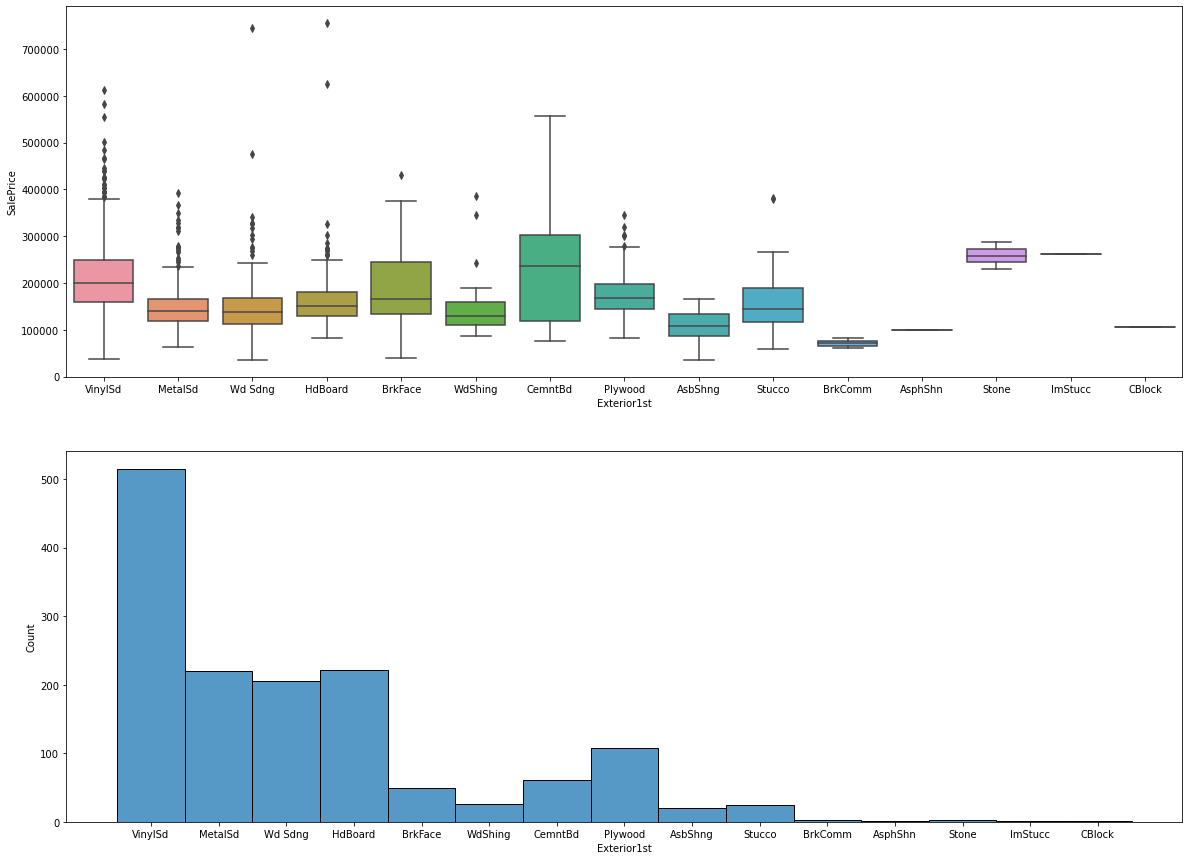

In [428]:
exc_cat['Exterior1st'].value_counts()
fig, ax = plt.subplots(2, 1, figsize = (20, 15))
sns.boxplot(data = exc_cat, x = 'Exterior1st', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['Exterior1st'],ax = ax[1])

<AxesSubplot:xlabel='Exterior2nd', ylabel='Count'>

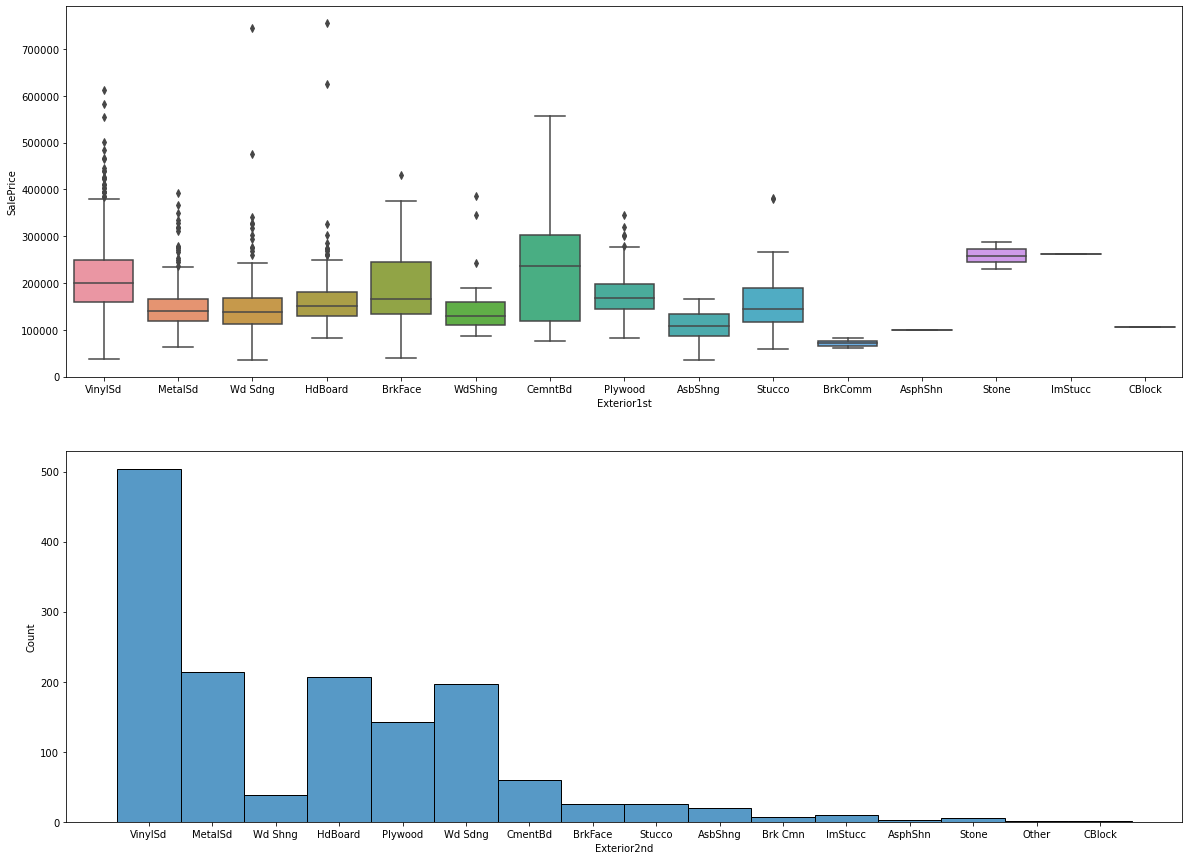

In [431]:
exc_cat['Exterior2nd'].value_counts()
fig, ax = plt.subplots(2, 1, figsize = (20, 15))
sns.boxplot(data = exc_cat, x = 'Exterior1st', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['Exterior2nd'],ax = ax[1])

<AxesSubplot:xlabel='ExterQual', ylabel='Count'>

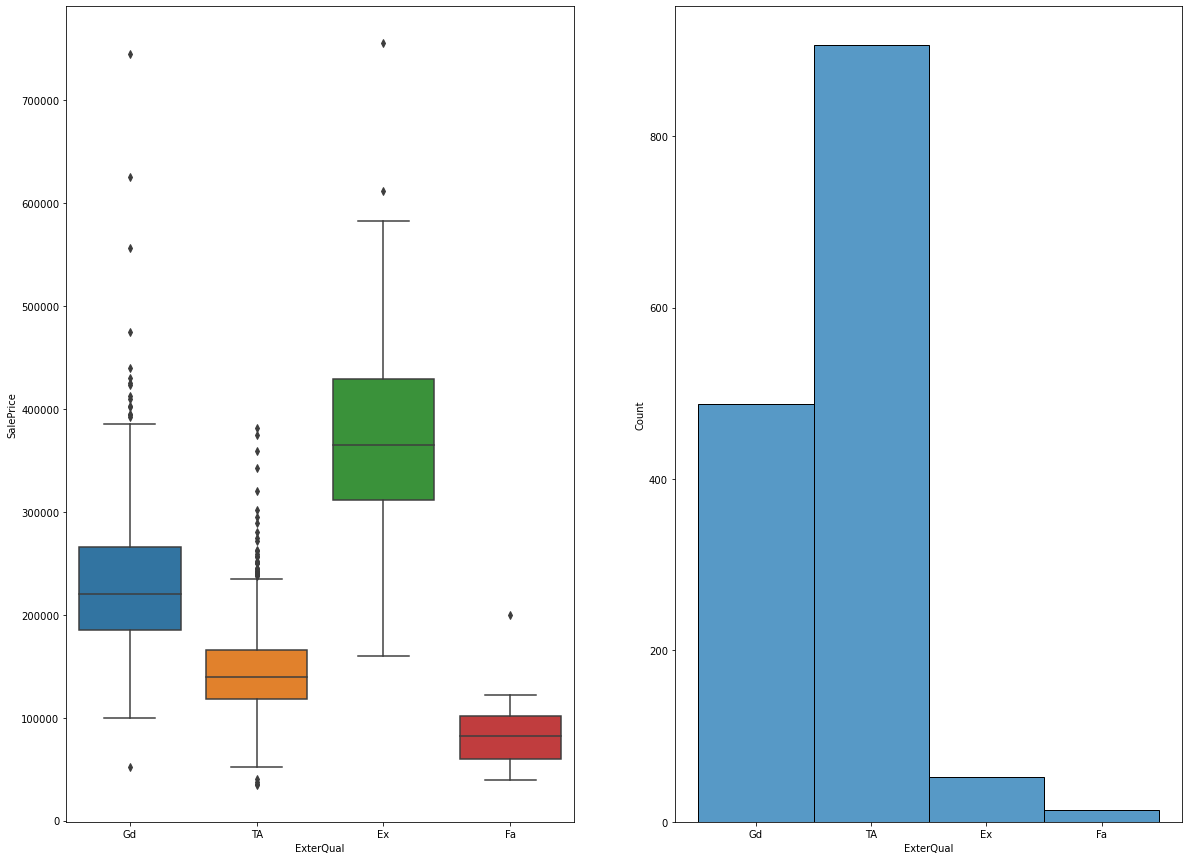

In [433]:
exc_cat['ExterQual'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (20, 15))
sns.boxplot(data = exc_cat, x = 'ExterQual', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['ExterQual'],ax = ax[1])

In [449]:
exc_cat["grp_ExterQual"] = exc_cat["ExterQual"]

<AxesSubplot:xlabel='Foundation', ylabel='Count'>

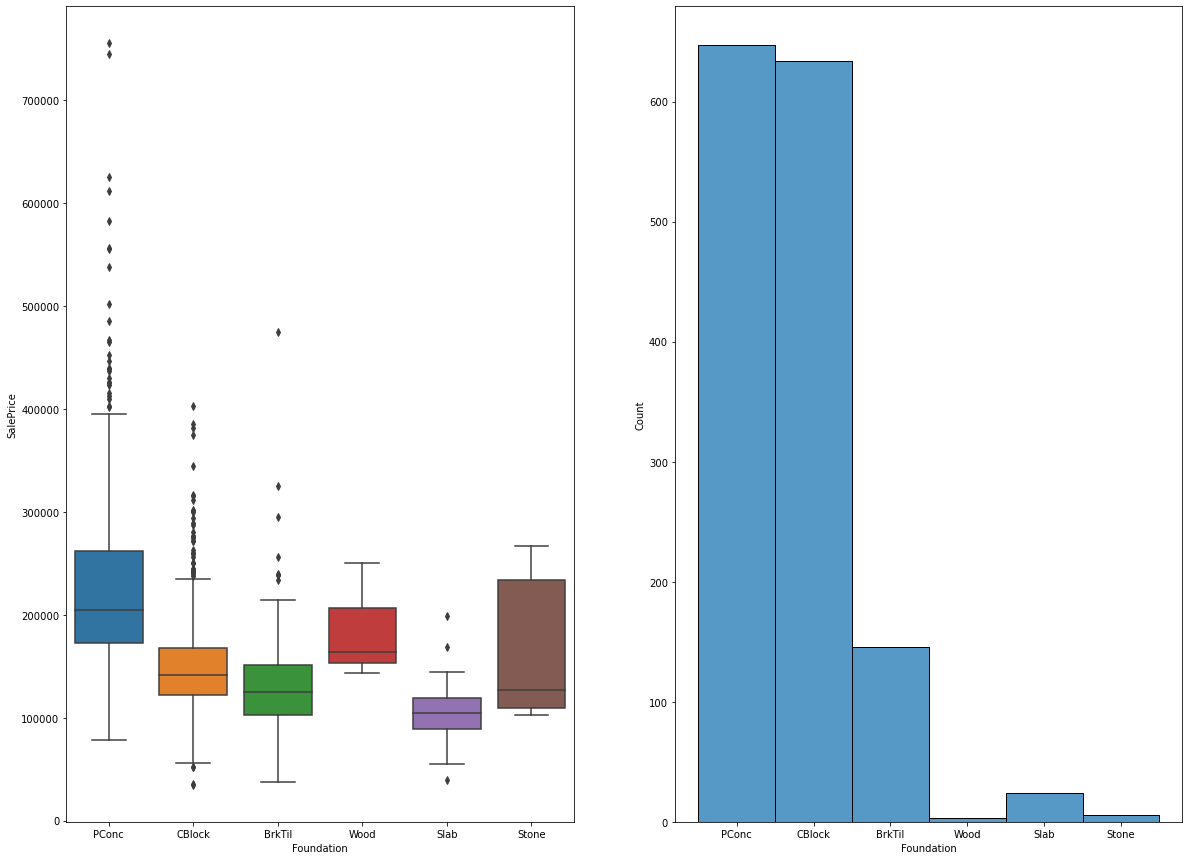

In [434]:
exc_cat['Foundation'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (20, 15))
sns.boxplot(data = exc_cat, x = 'Foundation', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['Foundation'],ax = ax[1])

In [437]:
Foundation_group = {
        "PConc": "Conc",
        "CBlock": "Other",
        "BrkTil": "Other",
        "Wood": "Other",
       "Slab": "Other",
        "Stone": "Other",
    }
exc_cat["grp_Foundation"] = exc_cat["Foundation"].map(Foundation_group)

<AxesSubplot:xlabel='grp_Foundation', ylabel='Count'>

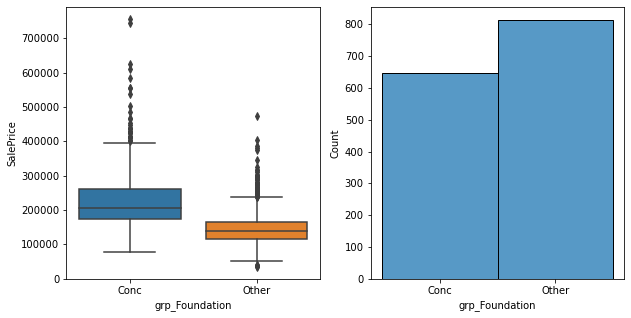

In [438]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'grp_Foundation', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['grp_Foundation'],ax = ax[1])

<AxesSubplot:xlabel='HeatingQC', ylabel='Count'>

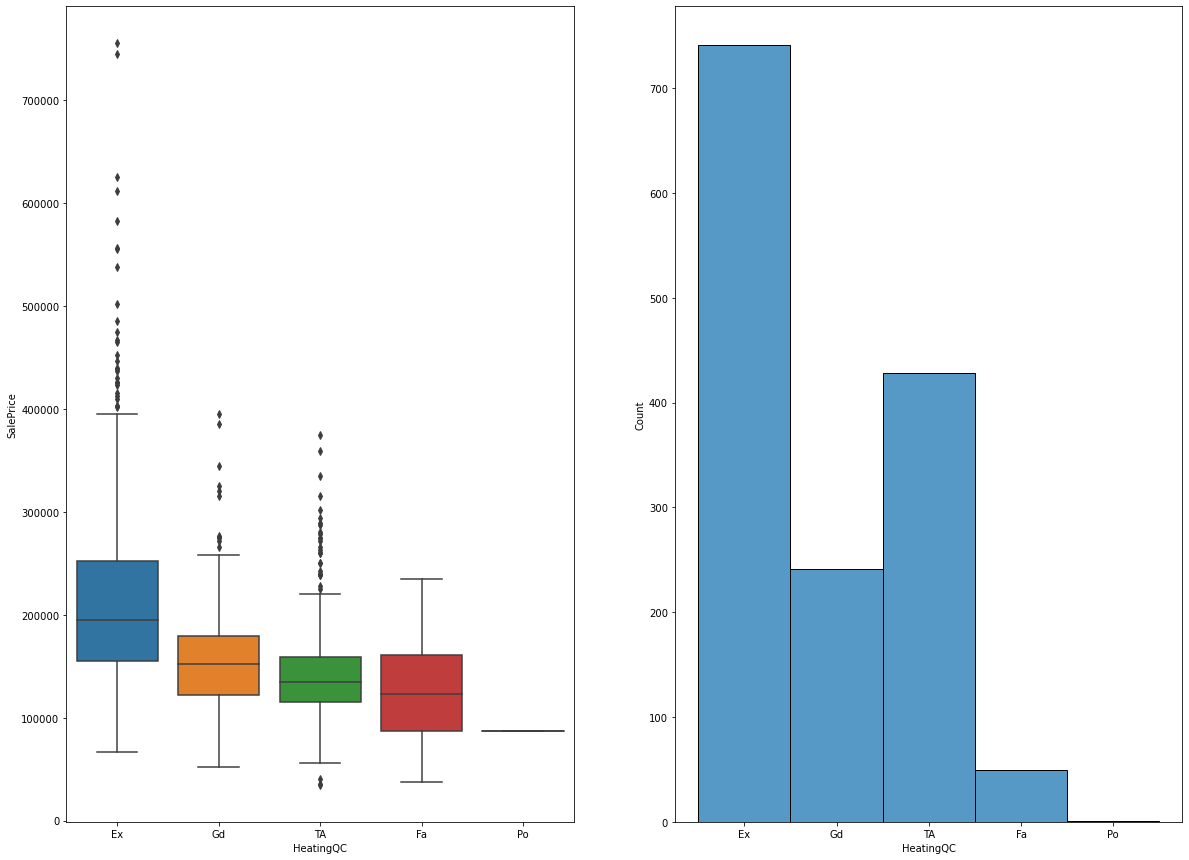

In [439]:
exc_cat['HeatingQC'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (20, 15))
sns.boxplot(data = exc_cat, x = 'HeatingQC', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['HeatingQC'],ax = ax[1])

In [440]:
HeatingQC_group = {
        "Ex": "Good",
        "Gd": "Bad",
        "TA": "Bad",
        "Fa": "Bad",
       "Po": "Bad",
    }
exc_cat["grp_HeatingQC"] = exc_cat["HeatingQC"].map(HeatingQC_group)

<AxesSubplot:xlabel='grp_HeatingQC', ylabel='Count'>

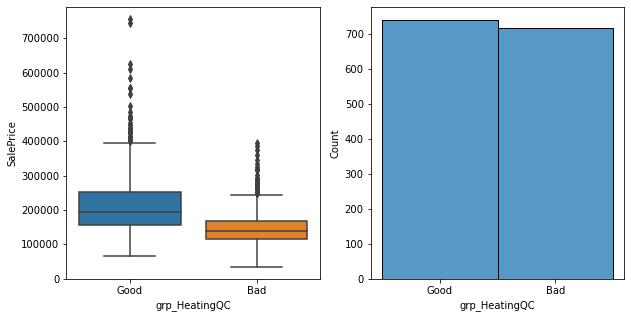

In [441]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = exc_cat, x = 'grp_HeatingQC', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['grp_HeatingQC'],ax = ax[1])

<AxesSubplot:xlabel='KitchenQual', ylabel='Count'>

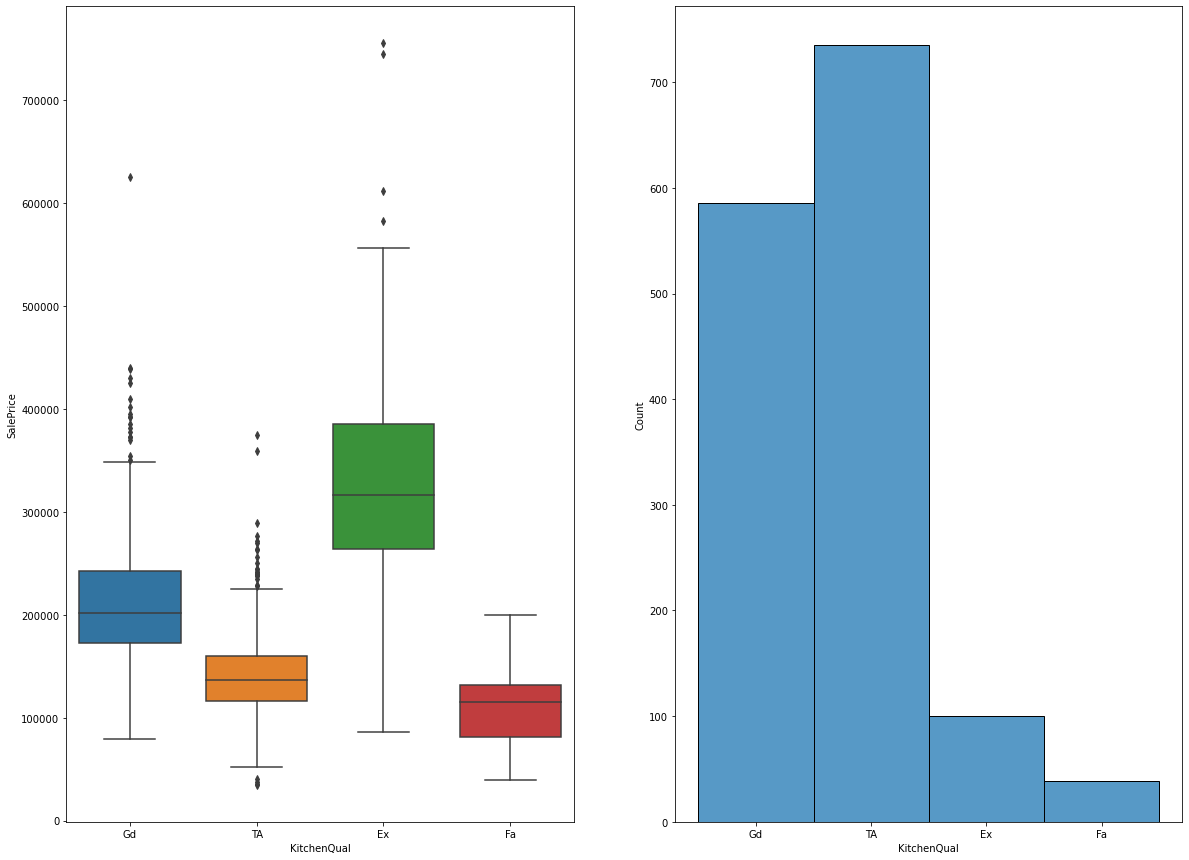

In [443]:
exc_cat['KitchenQual'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (20, 15))
sns.boxplot(data = exc_cat, x = 'KitchenQual', y = 'SalePrice',ax = ax[0])
sns.histplot(exc_cat['KitchenQual'],ax = ax[1])

In [444]:
exc_cat["grp_KitchenQual"] = exc_cat["KitchenQual"]

In [450]:
exc_cat.isnull().sum()

LotShape            0
Neighborhood        0
HouseStyle          0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
ExterQual           0
Foundation          0
BsmtQual            0
BsmtExposure        0
BsmtFinType1        0
HeatingQC           0
KitchenQual         0
GarageType          0
GarageFinish        0
SalePrice           0
grp_BsmtQual        0
grp_MasVnrType      0
grp_BsmtExposure    0
grp_BsmtFinType1    0
grp_GarageType      0
grp_GarageFinish    0
grp_LotShape        0
grp_Neighborhood    0
grp_HouseStyle      0
grp_Foundation      0
grp_HeatingQC       0
grp_KitchenQual     0
grp_ExterQual       0
dtype: int64

In [454]:
new_exc_cat=['grp_BsmtQual','GarageFinish',
             'grp_Neighborhood','grp_ExterQual','grp_Foundation',
             'grp_KitchenQual']

In [455]:
new_ok_cat=['grp_GarageType','grp_MasVnrType','grp_BsmtFinType1','grp_LotShape','grp_HouseStyle','grp_HeatingQC','grp_BsmtExposure']

In [456]:
new_bad_cat=['Exterior1st','Exterior2nd']


In [466]:
for_dummies=exc_cat[new_exc_cat]

### DUMMIES BABY!

In [459]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [468]:
dummies = pd.get_dummies(for_dummies)
dummies

,grp_BsmtQual_Bad,grp_BsmtQual_Excelent,grp_BsmtQual_Good,GarageFinish_Fin,GarageFinish_NoG,GarageFinish_RFn,GarageFinish_Unf,grp_Neighborhood_Best,grp_Neighborhood_High,grp_Neighborhood_Low,...,grp_ExterQual_Ex,grp_ExterQual_Fa,grp_ExterQual_Gd,grp_ExterQual_TA,grp_Foundation_Conc,grp_Foundation_Other,grp_KitchenQual_Ex,grp_KitchenQual_Fa,grp_KitchenQual_Gd,grp_KitchenQual_TA
0,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
2,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1456,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1457,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1458,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [479]:
final_cat=pd.concat((dummies,tb_housing['SalePrice']),axis=1)
cat_corr=np.abs(final_cat.corr())['SalePrice'].reset_index()
cat_corr.sort_values(by='SalePrice',ascending=False)

,index,SalePrice
21,SalePrice,1.000000
14,grp_ExterQual_TA,0.589044
7,grp_Neighborhood_Best,0.588288
1,grp_BsmtQual_Excelent,0.553105
0,grp_BsmtQual_Bad,0.537060
20,grp_KitchenQual_TA,0.519298
17,grp_KitchenQual_Ex,0.504094
16,grp_Foundation_Other,0.497734
15,grp_Foundation_Conc,0.497734
13,grp_ExterQual_Gd,0.452466


In [480]:
final_cat

,grp_BsmtQual_Bad,grp_BsmtQual_Excelent,grp_BsmtQual_Good,GarageFinish_Fin,GarageFinish_NoG,GarageFinish_RFn,GarageFinish_Unf,grp_Neighborhood_Best,grp_Neighborhood_High,grp_Neighborhood_Low,...,grp_ExterQual_Fa,grp_ExterQual_Gd,grp_ExterQual_TA,grp_Foundation_Conc,grp_Foundation_Other,grp_KitchenQual_Ex,grp_KitchenQual_Fa,grp_KitchenQual_Gd,grp_KitchenQual_TA,SalePrice
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,208500
1,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,181500
2,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,223500
3,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,140000
4,0,0,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,175000
1456,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,210000
1457,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,266500
1458,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,142125


# NUM VARS

**INSPECTING NUMERICAL VARIABLES**

In [205]:
total_num_var=len(correlacion)

In [206]:
correlacion=tb_housing.corr()['SalePrice'].reset_index()
correlacion.sort_values('SalePrice',ascending=False)

,index,SalePrice
37,SalePrice,1.000000
4,OverallQual,0.790982
16,GrLivArea,0.708624
26,GarageCars,0.640409
27,GarageArea,0.623431
12,TotalBsmtSF,0.613581
13,1stFlrSF,0.605852
19,FullBath,0.560664
23,TotRmsAbvGrd,0.533723
6,YearBuilt,0.522897


In [207]:
exc_num_var = tb_housing.select_dtypes(include = 'number').columns[np.abs(tb_housing.corr()['SalePrice']) > 0.5]

In [208]:
exc_num_var

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [209]:
exc_num=tb_housing[exc_num_var]
exc_num.corr()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.708624
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.560664
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.533723
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.640409
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,0.623431


<AxesSubplot:>

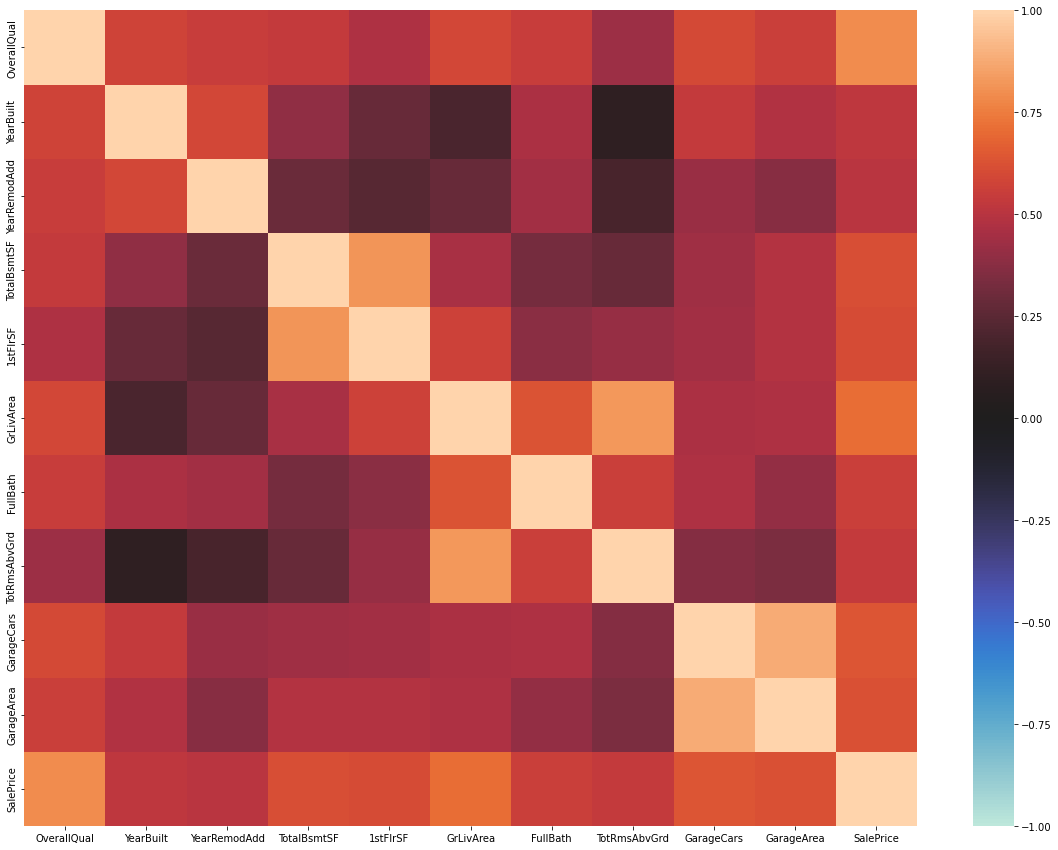

In [210]:
plt.figure(figsize=(20,15))
sns.heatmap(exc_num.corr(), vmin = -1, vmax = 1, center = 0)

<AxesSubplot:>

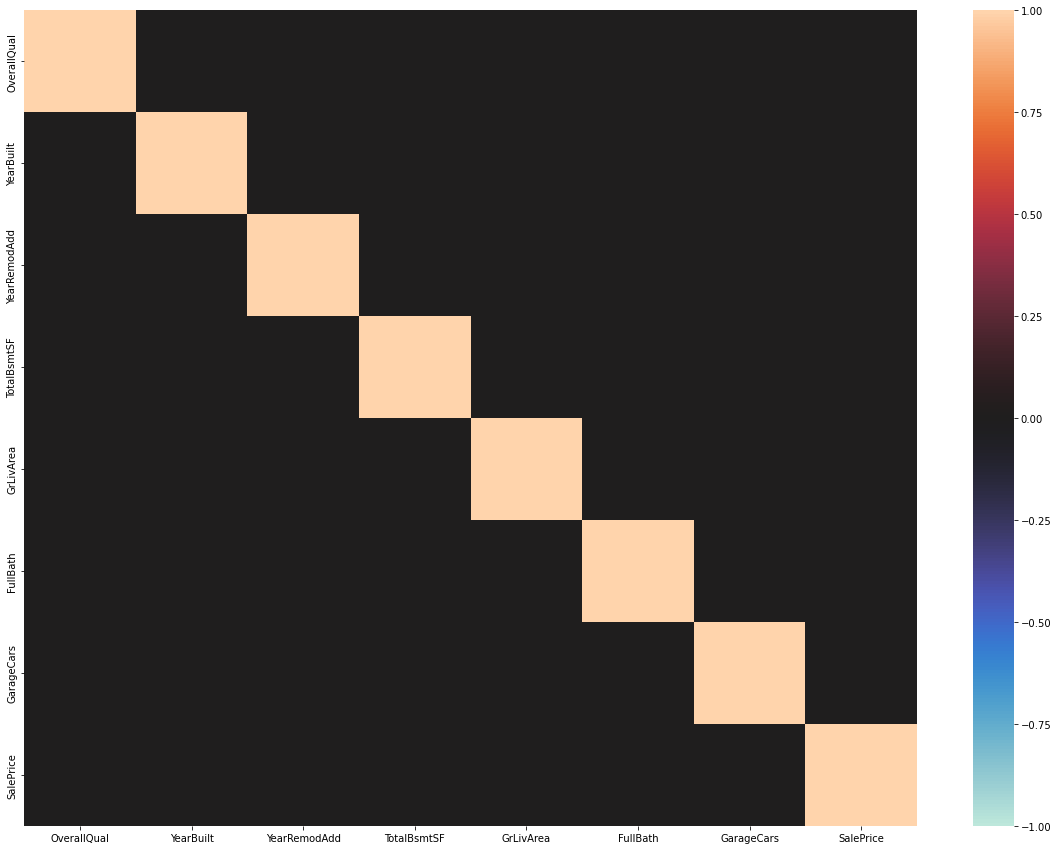

In [263]:
plt.figure(figsize=(20,15))
sns.heatmap(exc_num.corr()>.8, vmin = -1, vmax = 1, center = 0)

In [212]:
to_drop=['1stFlrSF','TotRmsAbvGrd','GarageArea']

In [213]:
exc_num.drop(columns=['1stFlrSF','TotRmsAbvGrd','GarageArea'],inplace=True)

In [218]:
exc_num.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
GarageCars      0
SalePrice       0
dtype: int64

In [260]:
for i in exc_num.columns:
    if (exc_num[i].value_counts().iloc[0]>len(tb_housing)*.7)==True:
        exc_num.drop(i,axis=1,inplace=True)

In [262]:
len(exc_num.columns)

8

# NEXT IS COMBINING NUM + CAT


In [486]:
final_cat.drop(columns=['SalePrice'],inplace=True)

In [487]:
model_pool=pd.concat((exc_num,final_cat),axis=1)
model_pool

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice,grp_BsmtQual_Bad,grp_BsmtQual_Excelent,...,grp_ExterQual_Ex,grp_ExterQual_Fa,grp_ExterQual_Gd,grp_ExterQual_TA,grp_Foundation_Conc,grp_Foundation_Other,grp_KitchenQual_Ex,grp_KitchenQual_Fa,grp_KitchenQual_Gd,grp_KitchenQual_TA
0,7,2003,2003,856,1710,2,2,208500,0,0,...,0,0,1,0,1,0,0,0,1,0
1,6,1976,1976,1262,1262,2,2,181500,0,0,...,0,0,0,1,0,1,0,0,0,1
2,7,2001,2002,920,1786,2,2,223500,0,0,...,0,0,1,0,1,0,0,0,1,0
3,7,1915,1970,756,1717,1,3,140000,1,0,...,0,0,0,1,0,1,0,0,1,0
4,8,2000,2000,1145,2198,2,3,250000,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,1647,2,2,175000,0,0,...,0,0,0,1,1,0,0,0,0,1
1456,6,1978,1988,1542,2073,2,2,210000,0,0,...,0,0,0,1,0,1,0,0,0,1
1457,7,1941,2006,1152,2340,2,1,266500,1,0,...,1,0,0,0,0,1,0,0,1,0
1458,5,1950,1996,1078,1078,1,1,142125,1,0,...,0,0,0,1,0,1,0,0,1,0


In [1231]:
pool_corr=np.abs(model_pool.corr())['SalePrice'].reset_index()
chosen=pool_corr.sort_values(by='SalePrice',ascending=False)[1:15]
chosen

,index,SalePrice
0,OverallQual,0.790982
4,GrLivArea,0.708624
6,GarageCars,0.640409
3,TotalBsmtSF,0.613581
22,grp_ExterQual_TA,0.589044
15,grp_Neighborhood_Best,0.588288
5,FullBath,0.560664
9,grp_BsmtQual_Excelent,0.553105
8,grp_BsmtQual_Bad,0.537060
1,YearBuilt,0.522897


In [917]:
for_model=list(chosen['index'])
model_ready=model_pool[for_model]
model_ready.corr()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,grp_ExterQual_TA,grp_Neighborhood_Best,FullBath,grp_BsmtQual_Excelent,grp_BsmtQual_Bad,YearBuilt,grp_KitchenQual_TA,YearRemodAdd,grp_KitchenQual_Ex,grp_Foundation_Other
OverallQual,1.000000,0.593007,0.600671,0.537808,-0.646247,0.563263,0.550600,0.470780,-0.603079,0.572323,-0.553891,0.550684,0.425750,-0.568211
GrLivArea,0.593007,1.000000,0.467247,0.454868,-0.386146,0.321444,0.630012,0.309962,-0.318309,0.199010,-0.350179,0.287389,0.306604,-0.292764
GarageCars,0.600671,0.467247,1.000000,0.434585,-0.481825,0.443070,0.469672,0.356425,-0.493472,0.537850,-0.399449,0.420622,0.273275,-0.453421
TotalBsmtSF,0.537808,0.454868,0.434585,1.000000,-0.390398,0.366833,0.323722,0.403166,-0.364483,0.391452,-0.311190,0.291066,0.360271,-0.307701
grp_ExterQual_TA,-0.646247,-0.386146,-0.481825,-0.390398,1.000000,-0.533907,-0.466339,-0.333227,0.600173,-0.589126,0.671600,-0.565424,-0.285299,0.620836
grp_Neighborhood_Best,0.563263,0.321444,0.443070,0.366833,-0.533907,1.000000,0.360826,0.417370,-0.454601,0.471623,-0.418521,0.389442,0.345037,-0.452329
FullBath,0.550600,0.630012,0.469672,0.323722,-0.466339,0.360826,1.000000,0.237403,-0.510981,0.468271,-0.418698,0.439046,0.174759,-0.461667
grp_BsmtQual_Excelent,0.470780,0.309962,0.356425,0.403166,-0.333227,0.417370,0.237403,1.000000,-0.296926,0.319394,-0.262924,0.286165,0.518457,-0.321970
grp_BsmtQual_Bad,-0.603079,-0.318309,-0.493472,-0.364483,0.600173,-0.454601,-0.510981,-0.296926,1.000000,-0.729396,0.498764,-0.575526,-0.191909,0.666045
YearBuilt,0.572323,0.199010,0.537850,0.391452,-0.589126,0.471623,0.468271,0.319394,-0.729396,1.000000,-0.459792,0.592855,0.204430,-0.651199


<AxesSubplot:>

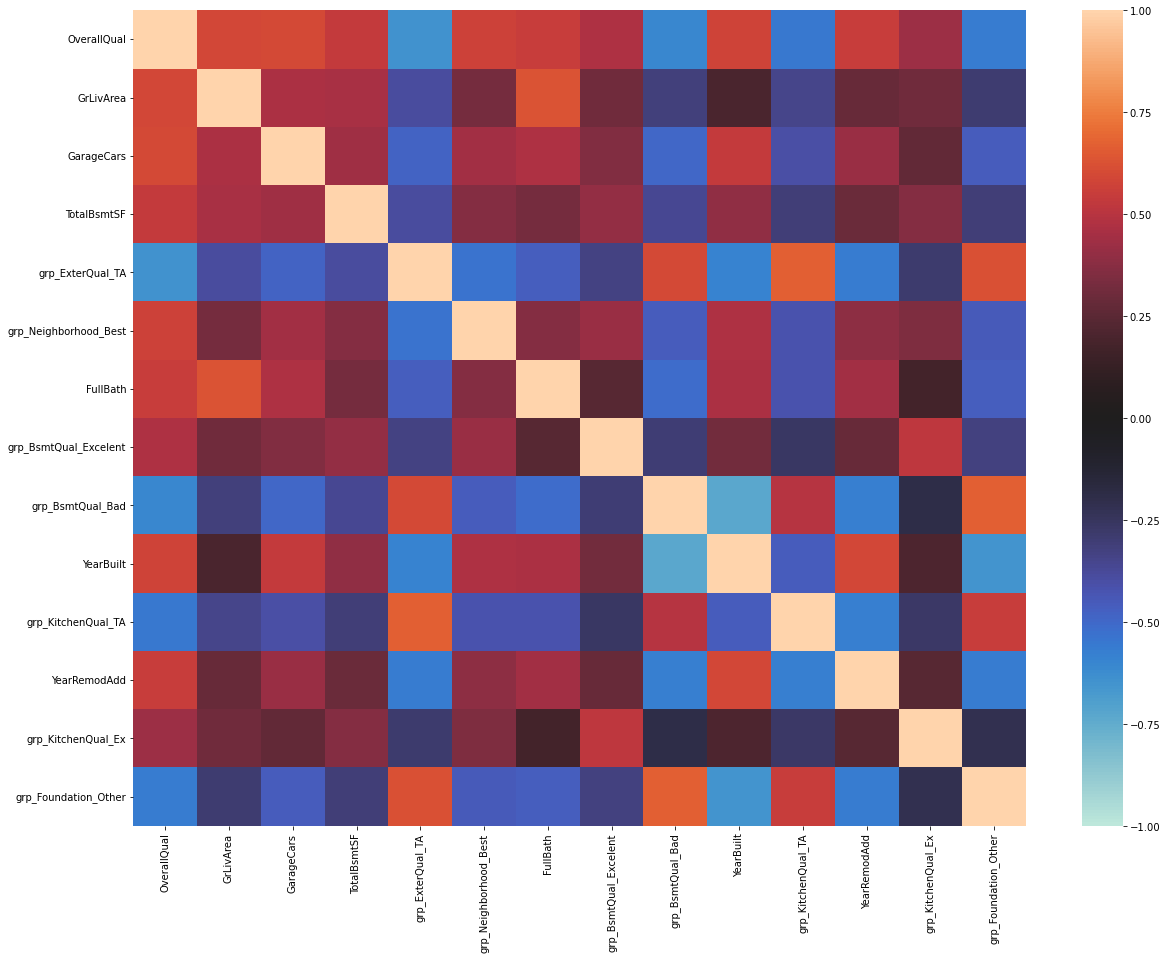

In [918]:
plt.figure(figsize=(20,15))
sns.heatmap(model_ready.corr(), vmin = -1, vmax = 1, center = 0)

<AxesSubplot:>

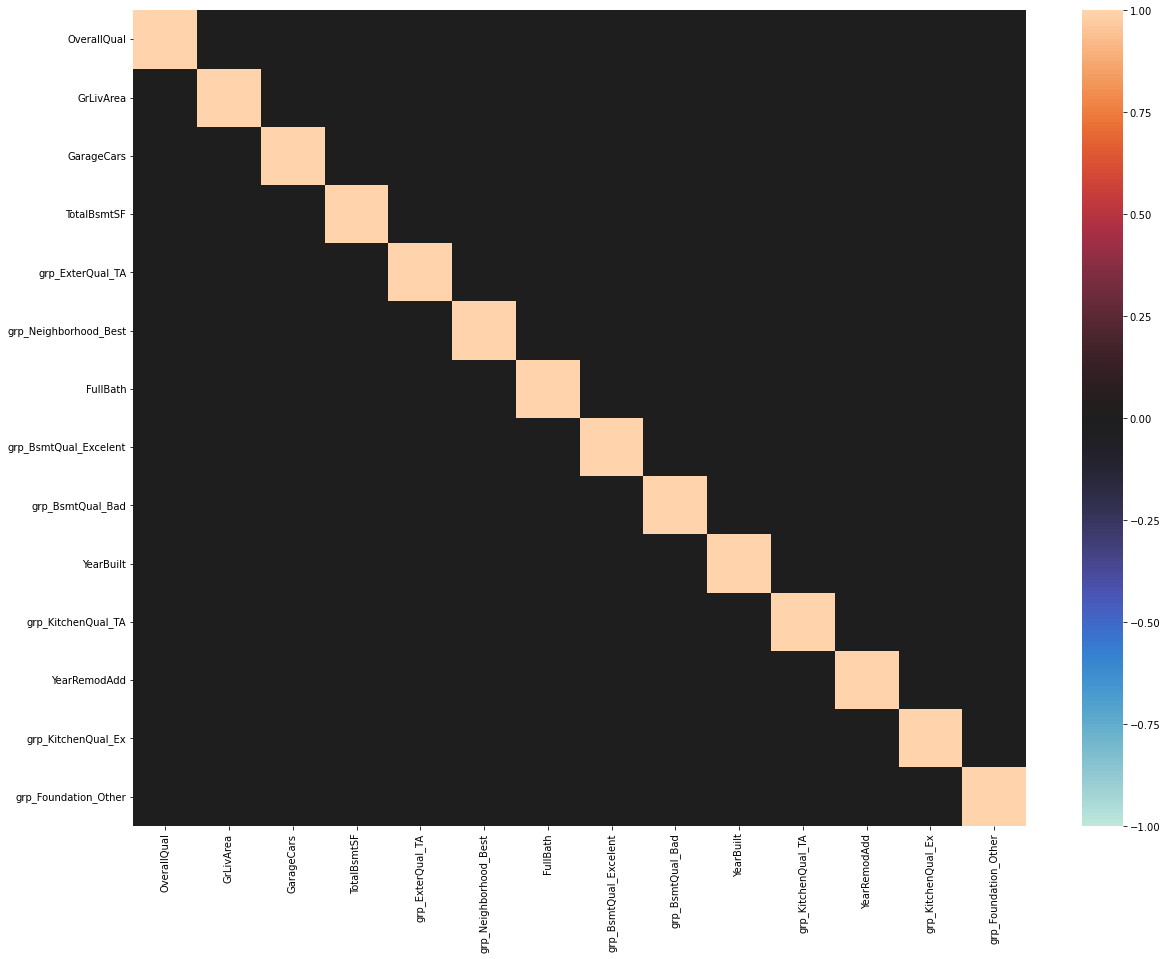

In [506]:
plt.figure(figsize=(20,15))
sns.heatmap(model_ready.corr()>.9, vmin = -1, vmax = 1, center = 0)

In [919]:
model_ready=pd.concat((model_ready,model_pool['SalePrice']),axis=1)

In [920]:
X=model_ready.drop('SalePrice', axis = 1)
y=model_ready['SalePrice']

In [921]:
model_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   OverallQual            1460 non-null   int64
 1   GrLivArea              1460 non-null   int64
 2   GarageCars             1460 non-null   int64
 3   TotalBsmtSF            1460 non-null   int64
 4   grp_ExterQual_TA       1460 non-null   uint8
 5   grp_Neighborhood_Best  1460 non-null   uint8
 6   FullBath               1460 non-null   int64
 7   grp_BsmtQual_Excelent  1460 non-null   uint8
 8   grp_BsmtQual_Bad       1460 non-null   uint8
 9   YearBuilt              1460 non-null   int64
 10  grp_KitchenQual_TA     1460 non-null   uint8
 11  YearRemodAdd           1460 non-null   int64
 12  grp_KitchenQual_Ex     1460 non-null   uint8
 13  grp_Foundation_Other   1460 non-null   uint8
 14  SalePrice              1460 non-null   int64
dtypes: int64(8), uint8(7)
memory usage: 10

In [922]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

# LM

In [926]:
lm_fit=LinearRegression()
lm_fit.fit(X_train,y_train)

LinearRegression()

In [927]:
lm_y_pred=lm_fit.predict(X_test)

In [928]:
lm_mse=mean_squared_error(y_test,lm_y_pred)
lm_error=np.sqrt(lm_mse)
print(f'The mse of the linear regression model is: {lm_mse} and the real error is {lm_error}')

The mse of the linear regression model is: 748453130.6138103 and the real error is 27357.871456197216


In [929]:
lm_test_r2=r2_score(y_test,lm_y_pred)
print(lm_test_r2)

0.8424051635407225


# CAT

In [924]:
cat_fit = cat.CatBoostRegressor(iterations=20000, depth=2, od_type="Iter", od_wait=1500, verbose = False)

In [925]:
cat_fit.fit(X_train, y_train, eval_set=(X_test, y_test))

In [568]:
cat_y_pred=cat_fit.predict(X_test)

In [569]:
cat_mse=mean_squared_error(y_test,cat_y_pred)
cat_error=np.sqrt(cat_mse)
print(f'The mse of the cat boost regression model is: {cat_mse} and the real error is {cat_error}')

The mse of the cat boost regression model is: 716335995.429752 and the real error is 26764.453953513643


In [570]:
cat_test_r2=r2_score(y_test,cat_y_pred)
print(cat_test_r2)

0.8709257601297522


In [574]:
(np.abs(y_test-cat_y_pred)/y_test.mean()).mean()

0.10576703451049005

# OTHER TRIES


### Y-LOG

LM

In [930]:
lmlog_fit=LinearRegression()
lmlog_fit.fit(X_train,np.log(y_train))

LinearRegression()

In [931]:
lmlog_y_pred=lmlog_fit.predict(X_test)

In [932]:
lmlog_mse=mean_squared_error(y_test,np.exp(lmlog_y_pred))
lmlog_error=np.sqrt(lmlog_mse)
print(f'The mse of the linear regression model is: {lmlog_mse} and the real error is {lmlog_error}')

The mse of the linear regression model is: 613936805.1201897 and the real error is 24777.748185018543


In [1087]:
lm_test2_r2=r2_score(y_test,np.exp(lmlog_y_pred))
print(lm_test2_r2)

0.8707290190370374


CAT

In [933]:
cat_fit2 = cat.CatBoostRegressor(iterations=20000, depth=2, od_type="Iter", od_wait=1500, verbose = False)

In [939]:
cat_fit2.fit(X_train, np.log(y_train), eval_set=(X_test, np.log(y_test)))

In [1013]:
cat_y_pred2=cat_fit2.predict(X_test)

In [1014]:
cat_mse2=mean_squared_error(y_test,np.exp(cat_y_pred2))
cat_error2=np.sqrt(cat_mse2)
print(f'The mse of the cat boost regression model is: {cat_mse2} and the real error is {cat_error2}')

The mse of the cat boost regression model is: 571149450.0816437 and the real error is 23898.733231735187


In [1086]:
cat_test2_r2=r2_score(y_test,np.exp(cat_y_pred2))
print(cat_test2_r2)

0.879738355686207


SOME X LOGS

In [592]:
tb_housing.select_dtypes(include = 'number').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [595]:
tb_housing['HouseAge']=tb_housing['YrSold']-tb_housing['YearBuilt']

In [607]:
rel_num_var = tb_housing.select_dtypes(include = 'number').columns[np.abs(tb_housing.corr()['SalePrice']) > 0.5]
corrs=np.abs(tb_housing[rel_num_var].corr()['SalePrice'])
corrs.reset_index().sort_values(by='SalePrice',ascending=False)


,index,SalePrice
10,SalePrice,1.000000
0,OverallQual,0.790982
5,GrLivArea,0.708624
8,GarageCars,0.640409
9,GarageArea,0.623431
3,TotalBsmtSF,0.613581
4,1stFlrSF,0.605852
6,FullBath,0.560664
7,TotRmsAbvGrd,0.533723
11,HouseAge,0.523350


In [718]:
new_exc_num=tb_housing[rel_num_var]


In [719]:
new_exc_num.drop(columns=['1stFlrSF','TotRmsAbvGrd','GarageArea','YearBuilt'],inplace=True)

<AxesSubplot:xlabel='HouseAge', ylabel='Count'>

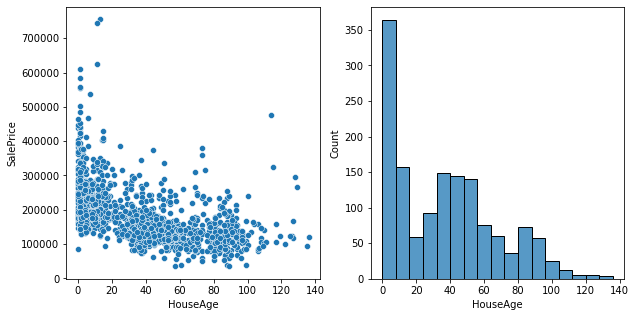

In [744]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = new_exc_num, x = 'HouseAge', y = 'SalePrice',ax = ax[0])
sns.histplot(new_exc_num['HouseAge'],ax = ax[1])

In [776]:
new_exc_num['HouseAge'].value_counts()

1      100
0       64
4       41
2       39
3       36
      ... 
115      1
122      1
128      1
114      1
125      1
Name: HouseAge, Length: 122, dtype: int64

In [777]:
new_exc_num["log_HouseAge"] = np.log(new_exc_num["HouseAge"]+1)
new_exc_num["log_SalePrice"] = np.log(new_exc_num["SalePrice"])

<AxesSubplot:xlabel='HouseAge', ylabel='Count'>

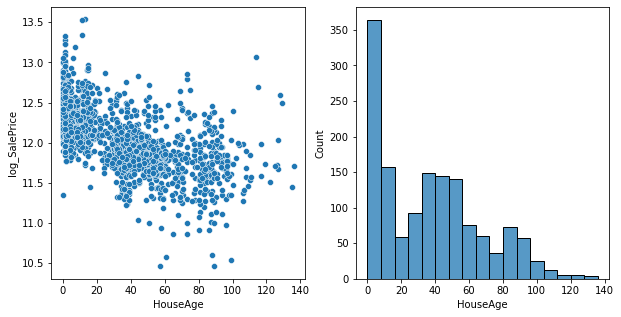

In [778]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = new_exc_num, x = 'HouseAge', y = 'log_SalePrice',ax = ax[0])
sns.histplot(new_exc_num['HouseAge'],ax = ax[1])

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

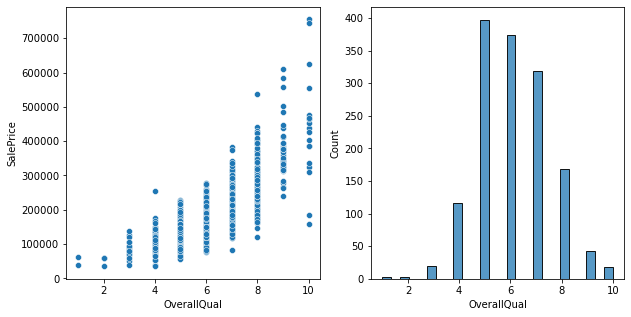

In [748]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = new_exc_num, x = 'OverallQual', y = 'SalePrice',ax = ax[0])
sns.histplot(new_exc_num['OverallQual'],ax = ax[1])

In [749]:
new_exc_num['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [750]:
new_exc_num["log_OverallQual"] = np.log(new_exc_num["OverallQual"])


<AxesSubplot:xlabel='log_OverallQual', ylabel='Count'>

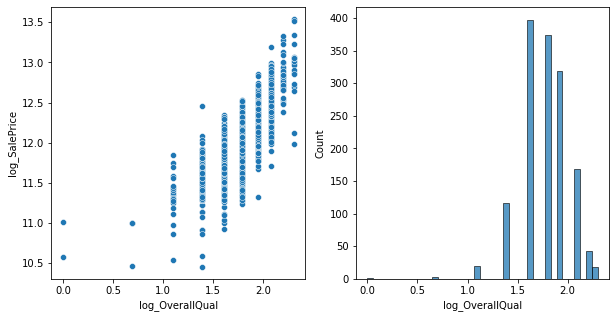

In [751]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = new_exc_num, x = 'log_OverallQual', y = 'log_SalePrice',ax = ax[0])
sns.histplot(new_exc_num['log_OverallQual'],ax = ax[1])

<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

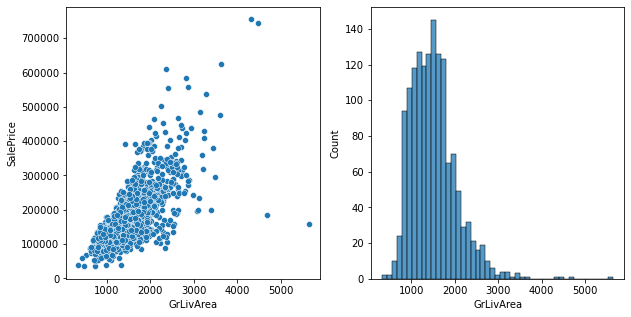

In [752]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = new_exc_num, x = 'GrLivArea', y = 'SalePrice',ax = ax[0])
sns.histplot(new_exc_num['GrLivArea'],ax = ax[1])

In [753]:
new_exc_num["GrLivArea"].unique()

array([1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077, 1040,
       2324,  912, 1494, 1253,  854, 1004, 1296, 1114, 1339, 2376, 1108,
       1795, 1060, 1600,  900, 1704,  520, 1317, 1228, 1234, 1700, 1561,
       2452, 1097, 1297, 1057, 1152, 1324, 1328,  884,  938, 1150, 1752,
       2149, 1656, 1452,  955, 1470, 1176,  816, 1842, 1360, 1425, 1739,
       1720, 2945,  780, 1158, 1111, 1370, 2034, 2473, 2207, 1479,  747,
       2287, 2223,  845, 1718, 1086, 1605,  988,  952, 1285, 1768, 1230,
       2142, 1337, 1563, 1065, 1474, 2417, 1560, 1224, 1526,  990, 1235,
        964, 2291, 1588,  960,  835, 1225, 1610, 1732, 1535, 1226, 1818,
       1992, 1047,  789, 1517, 1844, 1855, 1430, 2696, 2259, 2320, 1458,
       1092, 1125, 3222, 1456, 1123, 1080, 1199, 1586,  754,  958,  840,
       1348, 1053, 2157, 2054, 1327, 1721, 1682, 1214, 1959, 1852, 1764,
        864, 1734, 1385, 1501, 1728, 1709,  875, 2035, 1344,  969, 1993,
       1252, 1200, 1096, 1968, 1947, 2462, 1232, 26

<AxesSubplot:xlabel='log_GrLivArea', ylabel='Count'>

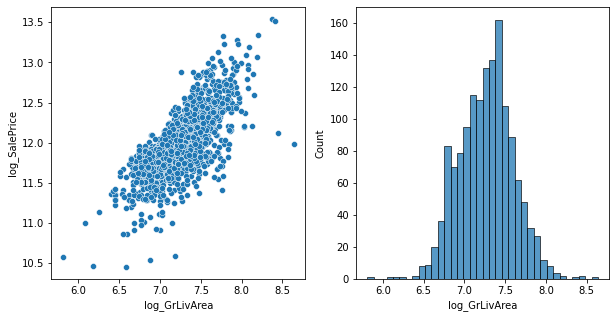

In [754]:
new_exc_num["log_GrLivArea"] = np.log(new_exc_num["GrLivArea"])
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = new_exc_num, x = 'log_GrLivArea', y = 'log_SalePrice',ax = ax[0])
sns.histplot(new_exc_num['log_GrLivArea'],ax = ax[1])

<AxesSubplot:xlabel='GarageCars', ylabel='Count'>

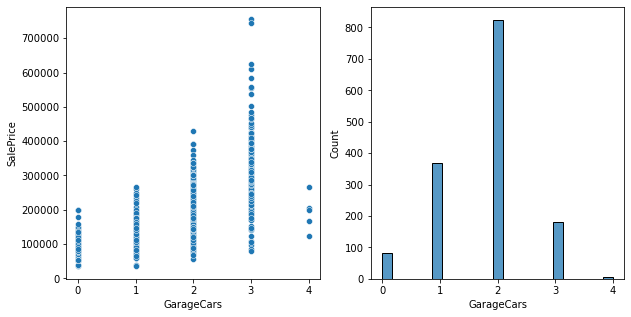

In [755]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = new_exc_num, x = 'GarageCars', y = 'SalePrice',ax = ax[0])
sns.histplot(new_exc_num['GarageCars'],ax = ax[1])

In [756]:
new_exc_num['GarageCars'].unique()

array([2, 3, 1, 0, 4])

<AxesSubplot:xlabel='log_GarageCars', ylabel='Count'>

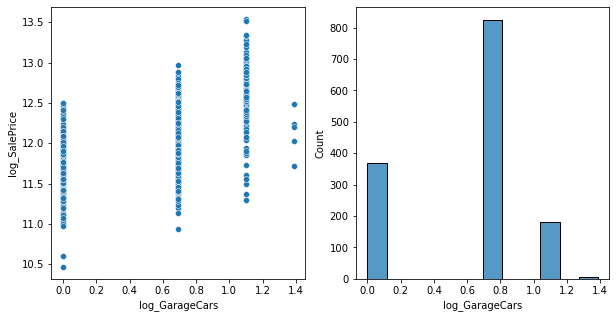

In [757]:
new_exc_num["log_GarageCars"] = np.log(new_exc_num["GarageCars"])
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = new_exc_num, x = 'log_GarageCars', y = 'log_SalePrice',ax = ax[0])
sns.histplot(new_exc_num['log_GarageCars'],ax = ax[1])

<AxesSubplot:xlabel='YearRemodAdd', ylabel='Count'>

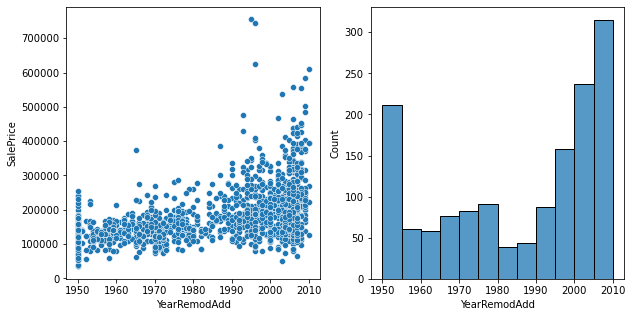

In [758]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = new_exc_num, x = 'YearRemodAdd', y = 'SalePrice',ax = ax[0])
sns.histplot(new_exc_num['YearRemodAdd'],ax = ax[1])

In [759]:
new_exc_num['YearRemodAdd'].unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974])

<AxesSubplot:xlabel='log_YearRemodAdd', ylabel='Count'>

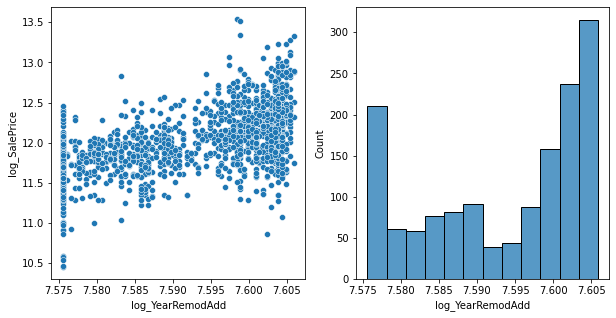

In [760]:
new_exc_num["log_YearRemodAdd"] = np.log(new_exc_num["YearRemodAdd"])
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = new_exc_num, x = 'log_YearRemodAdd', y = 'log_SalePrice',ax = ax[0])
sns.histplot(new_exc_num['log_YearRemodAdd'],ax = ax[1])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Count'>

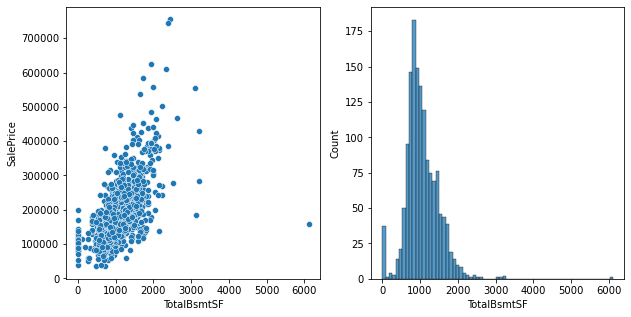

In [761]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = new_exc_num, x = 'TotalBsmtSF', y = 'SalePrice',ax = ax[0])
sns.histplot(new_exc_num['TotalBsmtSF'],ax = ax[1])

In [762]:
new_exc_num['TotalBsmtSF'].value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64

<AxesSubplot:xlabel='log_TotalBsmtSF', ylabel='Count'>

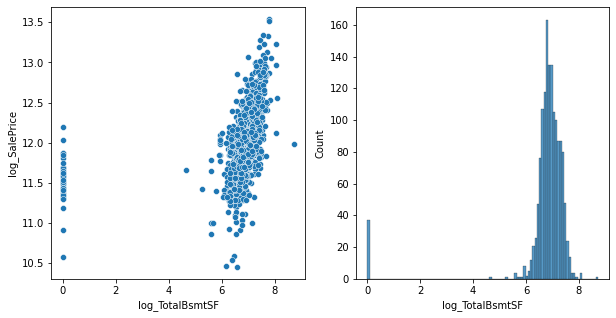

In [763]:
new_exc_num["log_TotalBsmtSF"] = np.log(new_exc_num["TotalBsmtSF"]+1)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = new_exc_num, x = 'log_TotalBsmtSF', y = 'log_SalePrice',ax = ax[0])
sns.histplot(new_exc_num['log_TotalBsmtSF'],ax = ax[1])

<AxesSubplot:xlabel='FullBath', ylabel='Count'>

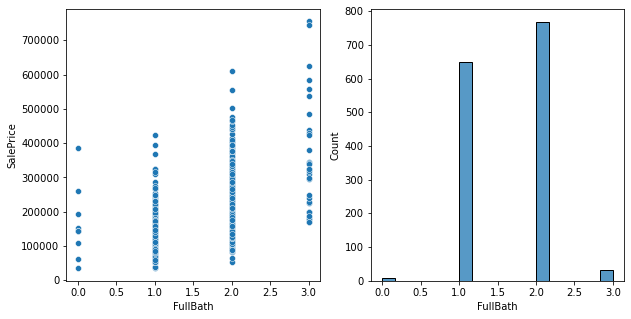

In [764]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = new_exc_num, x = 'FullBath', y = 'SalePrice',ax = ax[0])
sns.histplot(new_exc_num['FullBath'],ax = ax[1])

<AxesSubplot:xlabel='log_FullBath', ylabel='Count'>

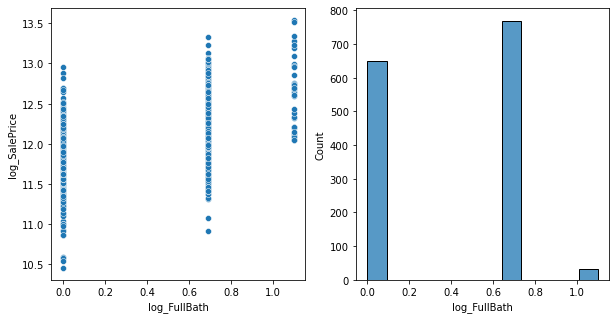

In [765]:
new_exc_num["log_FullBath"] = np.log(new_exc_num["FullBath"])
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = new_exc_num, x = 'log_FullBath', y = 'log_SalePrice',ax = ax[0])
sns.histplot(new_exc_num['log_FullBath'],ax = ax[1])

In [766]:
new_exc_num.columns

Index(['OverallQual', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'SalePrice', 'HouseAge', 'log_HouseAge', 'log_SalePrice',
       'log_OverallQual', 'log_GrLivArea', 'log_GarageCars', 'log_TotalBsmtSF',
       'log_YearRemodAdd', 'log_FullBath'],
      dtype='object')

In [817]:
final_num=new_exc_num[['log_HouseAge', 'log_SalePrice',
       'log_OverallQual', 'log_GrLivArea', 'GarageCars',
       'log_YearRemodAdd', 'log_TotalBsmtSF', 'FullBath']]

In [955]:
model_pool_2=pd.concat((final_num,final_cat),axis=1)


In [962]:
pool_2_corr=np.abs(model_pool_2.corr())['log_SalePrice'].reset_index()
chosen_2=pool_2_corr.sort_values(by='log_SalePrice',ascending=False)[1:12]
chosen_2


,index,log_SalePrice
2,log_OverallQual,0.794007
3,log_GrLivArea,0.730255
4,GarageCars,0.680625
0,log_HouseAge,0.606352
22,grp_ExterQual_TA,0.595881
7,FullBath,0.594771
8,grp_BsmtQual_Bad,0.586258
5,log_YearRemodAdd,0.565590
15,grp_Neighborhood_Best,0.552456
28,grp_KitchenQual_TA,0.538237


In [963]:
for_model_2=list(chosen_2['index'])
model_ready_2=model_pool_2[for_model_2]
model_ready_2

,log_OverallQual,log_GrLivArea,GarageCars,log_HouseAge,grp_ExterQual_TA,FullBath,grp_BsmtQual_Bad,log_YearRemodAdd,grp_Neighborhood_Best,grp_KitchenQual_TA,grp_Foundation_Conc
0,1.945910,7.444249,2,1.791759,0,2,0,7.602401,0,0,1
1,1.791759,7.140453,2,3.465736,1,2,0,7.588830,1,1,0
2,1.945910,7.487734,2,2.079442,0,2,0,7.601902,0,0,1
3,1.945910,7.448334,3,4.521789,1,1,1,7.585789,0,0,0
4,2.079442,7.695303,3,2.197225,0,2,0,7.600902,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,1.791759,7.406711,2,2.197225,1,2,0,7.600902,0,1,1
1456,1.791759,7.636752,2,3.496508,1,2,0,7.594884,0,1,0
1457,1.945910,7.757906,1,4.248495,0,2,1,7.603898,0,0,0
1458,1.609438,6.982863,1,4.110874,1,1,1,7.598900,0,0,0


# LM2

In [993]:
X_2=model_ready_2
y_2=model_pool_2['log_SalePrice']

In [994]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2,test_size=0.20)

In [995]:
lm2_fit=LinearRegression()
lm2_fit.fit(X_train_2,y_train_2)

LinearRegression()

In [996]:
lm2_y_pred=lm2_fit.predict(X_test_2)

In [997]:
lm2_mse=mean_squared_error(np.exp(y_test_2),np.exp(lm2_y_pred))
lm2_error=np.sqrt(lm2_mse)
print(f'The mse of the linear regression model is: {lm2_mse} and the real error is {lm2_error}')

The mse of the linear regression model is: 1262359515.0349376 and the real error is 35529.699056351965


In [998]:
lm2_test_r2=r2_score(y_test_2,lm2_y_pred)
print(lm2_test_r2)

0.8060206458148206


In [1009]:
cat_fit3 = cat.CatBoostRegressor(iterations=20000, depth=2, od_type="Iter", od_wait=1500, verbose = False)


In [1015]:
cat_fit3.fit(X_train_2,y_train_2, eval_set=(X_test_2, y_test_2))



In [1016]:
cat_y_pred3=cat_fit3.predict(X_test_2)

In [1019]:
cat_mse3=mean_squared_error(np.exp(y_test_2),np.exp(cat_y_pred3))
cat_error3=np.sqrt(cat_mse3)
print(f'The mse of the cat boost regression model is: {cat_mse3} and the real error is {cat_error3}')

The mse of the cat boost regression model is: 1015019080.352983 and the real error is 31859.364092099877


# LM3

In [1004]:
X3=model_pool_2.drop('log_SalePrice', axis = 1)
y3=model_pool_2['log_SalePrice']

In [1005]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3,y3,test_size=0.20)

In [1006]:
lm3_fit=LinearRegression()
lm3_fit.fit(X_train_3,y_train_3)

LinearRegression()

In [1007]:
lm3_y_pred=lm3_fit.predict(X_test_3)

In [1008]:
lm3_mse=mean_squared_error(np.exp(y_test_3),np.exp(lm3_y_pred))
lm3_error=np.sqrt(lm3_mse)
print(f'The mse of the linear regression model is: {lm3_mse} and the real error is {lm3_error}')

The mse of the linear regression model is: 928113802.7515446 and the real error is 30464.960245362945


In [1020]:
cat_fit4 = cat.CatBoostRegressor(iterations=20000, depth=2, od_type="Iter", od_wait=1500, verbose = False)


In [1021]:
cat_fit4.fit(X_train_3,y_train_3, eval_set=(X_test_3, y_test_3))


In [1024]:
cat_y_pred4=cat_fit4.predict(X_test_3)

In [1025]:
cat_mse4=mean_squared_error(np.exp(y_test_3),np.exp(cat_y_pred4))
cat_error4=np.sqrt(cat_mse3)
print(f'The mse of the cat boost regression model is: {cat_mse4} and the real error is {cat_error4}')

The mse of the cat boost regression model is: 710221259.5543151 and the real error is 31859.364092099877


# NOW TRYING SCALING

In [1029]:
X

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,grp_ExterQual_TA,grp_Neighborhood_Best,FullBath,grp_BsmtQual_Excelent,grp_BsmtQual_Bad,YearBuilt,grp_KitchenQual_TA,YearRemodAdd,grp_KitchenQual_Ex,grp_Foundation_Other
0,7,1710,2,856,0,0,2,0,0,2003,0,2003,0,0
1,6,1262,2,1262,1,1,2,0,0,1976,1,1976,0,1
2,7,1786,2,920,0,0,2,0,0,2001,0,2002,0,0
3,7,1717,3,756,1,0,1,0,1,1915,0,1970,0,1
4,8,2198,3,1145,0,1,2,0,0,2000,0,2000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,1,0,2,0,0,1999,1,2000,0,0
1456,6,2073,2,1542,1,0,2,0,0,1978,1,1988,0,1
1457,7,2340,1,1152,0,0,2,0,1,1941,0,2006,0,1
1458,5,1078,1,1078,1,0,1,0,1,1950,0,1996,0,1


In [1072]:
scaler=StandardScaler()

In [1073]:
scaler.fit(X)

StandardScaler()

In [1074]:
feature_names = ["sca_" + name for name in scaler.feature_names_in_]

In [1075]:
X_trans_matrix=scaler.transform(X)

In [1077]:
X_trans=pd.DataFrame(X_trans_matrix,columns=feature_names)


In [1078]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X_trans,y,test_size=0.20)

In [1083]:
lmlogtrans_fit=LinearRegression()
lmlogtrans_fit.fit(X_trainT,np.log(y_trainT))

LinearRegression()

In [1084]:
lmlogtrans_y_pred=lmlogtrans_fit.predict(X_testT)

In [1085]:
lmlogtrans_mse=mean_squared_error(y_testT,np.exp(lmlogtrans_y_pred))
lmlogtrans_error=np.sqrt(lmlogtrans_mse)
print(f'The mse of the linear regression model is: {lmlogtrans_mse} and the real error is {lmlogtrans_error}')

The mse of the linear regression model is: 11772569842.107267 and the real error is 108501.4739167504


# STAR MODEL

In [1162]:
elite = tb_housing.select_dtypes(include = 'number').columns[np.abs(tb_housing.corr()['SalePrice']) > 0.5]
elt=tb_housing[elite]
elt.corr()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,HouseAge
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982,-0.572629
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897,-0.999036
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101,-0.590360
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.613581,-0.391498
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.605852,-0.282143
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.708624,-0.200302
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.560664,-0.468403
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.533723,-0.096955
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.640409,-0.538727
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,0.623431,-0.479408


In [1163]:
elt.drop(columns=['1stFlrSF','GarageArea','YearBuilt','TotRmsAbvGrd'],inplace=True)

In [1164]:
Xe=elt.drop('SalePrice', axis = 1)
ye=elt['SalePrice']

In [1165]:
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(Xe,np.log(ye),test_size=0.20)

In [1166]:
lme=LinearRegression()
lme.fit(X_train_e,y_train_e)

LinearRegression()

In [1167]:
lme_y_pred=lme.predict(X_test_e)

In [1168]:
lme_mse=mean_squared_error(np.exp(y_test_e),np.exp(lme_y_pred))
lme_error=np.sqrt(lme_mse)
print(f'The mse of the linear regression model is: {lme_mse} and the real error is {lme_error}')

The mse of the linear regression model is: 730480419.773554 and the real error is 27027.4012767331


In [1169]:
lme_test_r2=r2_score(np.exp(y_test_e),np.exp(lme_y_pred))
print(lme_test_r2)

0.8662214156357539


In [1170]:
cat_e = cat.CatBoostRegressor(iterations=20000, depth=2, od_type="Iter", od_wait=1500, verbose = False)


In [1171]:
cat_e.fit(X_train_e,y_train_e, eval_set=(X_test_e, y_test_e))


In [1172]:
cat_e_y_pred=cat_e.predict(X_test_e)

In [1173]:
cat_e_mse=mean_squared_error(np.exp(y_test_e),np.exp(cat_e_y_pred))
cat_e_error=np.sqrt(cat_e_mse)
print(f'The mse of the cat boost regression model is: {cat_e_mse} and the real error is {cat_e_error}')

The mse of the cat boost regression model is: 636324688.2668469 and the real error is 25225.476968074297


In [1174]:
cate_test_r2=r2_score(np.exp(y_test_e),np.exp(cat_e_y_pred))
print(cate_test_r2)

0.883464890107872


In [1218]:
y_l=np.log(y)

In [1219]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X,y_l,test_size=0.20)

In [1220]:
last=LinearRegression()

In [1221]:
rfe=RFE(last, n_features_to_select=3)

In [1222]:
rfe.fit(X_train_l,y_train_l)
rfe.ranking_

array([ 1, 11,  1, 12,  8,  3,  2,  4,  6, 10,  5,  9,  1,  7])

In [1223]:
X.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'grp_ExterQual_TA', 'grp_Neighborhood_Best', 'FullBath',
       'grp_BsmtQual_Excelent', 'grp_BsmtQual_Bad', 'YearBuilt',
       'grp_KitchenQual_TA', 'YearRemodAdd', 'grp_KitchenQual_Ex',
       'grp_Foundation_Other'],
      dtype='object')

In [1224]:
X_reduced=X[['OverallQual','GarageCars','grp_KitchenQual_Ex']]

In [1225]:
X_train_l, X_test_R, y_train_R, y_test_R = train_test_split(X_reduced,y_l,test_size=0.20)

In [1226]:
model_reduced=LinearRegression()

In [1227]:
model_reduced.fit(X_train_l,y_train_R)

LinearRegression()

In [1228]:
y_pred_R=model_reduced.predict(X_test_R)

In [1229]:
R_mse=mean_squared_error(np.exp(y_test_R),np.exp(y_pred_R))
R_error=np.sqrt(R_mse)
print(f'The mse of the linear regression model is: {R_mse} and the real error is {R_error}')

The mse of the linear regression model is: 1631260769.0269427 and the real error is 40388.86937049541
